In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#as here the delimiter or separaters are the random spaced whitespace so we use delim_whitespace
mpg=pd.read_csv('mpg.csv',na_values=['?'],delim_whitespace=True,
                names=('milage','cyl','disp','hp','wg','acc','mfg_y','ori','car'))
mpg

,milage,cyl,disp,hp,wg,acc,mfg_y,ori,car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
#replacing the non_standard na value indicator ''?'' with NaN
mpg.replace('?','NaN',inplace=True)

In [4]:
mpg.tail()

,milage,cyl,disp,hp,wg,acc,mfg_y,ori,car
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [5]:
mpg.dtypes

milage    float64
cyl         int64
disp      float64
hp        float64
wg        float64
acc       float64
mfg_y       int64
ori         int64
car        object
dtype: object

In [6]:
#checking null values
for i in mpg.columns:
    nl=mpg[i].isnull().sum()
    if nl>0:
        if mpg[i].dtypes=='object':
            print(i,'has',nl,'numbers of null values and to be replaced by \'MODE VALUES\' of',i)
        if mpg[i].dtypes=='float64':
            print(i,'has',nl,'numbers of null values and to be replaced by \'MEAN VALUES\' of', i)
        if mpg[i].dtypes=='int64':
            print(i,'has',nl,'numbers of null values and to be replaced by \'MEAN VALUES\' of', i)
    elif nl<0:
        print('There is \'NO NULL VALUES\' to be removed.')

hp has 6 numbers of null values and to be replaced by 'MEAN VALUES' of hp


In [7]:
mpg['hp'].replace(np.NaN,mpg['hp'].mean(),inplace=True)

In [8]:
#checking null values again
for i in mpg.columns:
    nl=mpg[i].isnull().sum()
    if nl>0:
        print(i, 'has', nl,'number of null values')
else:
    print('There is \'NO MORE NULL VALUES\' to be removed.')

There is 'NO MORE NULL VALUES' to be removed.


In [9]:
#checking duplicated
dups=mpg.duplicated(keep='first').sum()
if dups>0:
    print('Dataset got',dups,' number duplicated rows and removing it.....' )
    MPG=mpg.drop_duplicates(keep='first')
    print('new shape of dataset after dropping duplicates=',MPG.shape)
else:
    print('The datset has no \'DUPLICATE ROWS\' to remove.')  

The datset has no 'DUPLICATE ROWS' to remove.


In [10]:
mpg.min()

milage                          9
cyl                             3
disp                           68
hp                             46
wg                           1613
acc                             8
mfg_y                          70
ori                             1
car       amc ambassador brougham
dtype: object

In [11]:
mpg.max()

milage                46.6
cyl                      8
disp                   455
hp                     230
wg                    5140
acc                   24.8
mfg_y                   82
ori                      3
car       vw rabbit custom
dtype: object

In [12]:
mpg.mean()

milage      23.514573
cyl          5.454774
disp       193.425879
hp         104.469388
wg        2970.424623
acc         15.568090
mfg_y       76.010050
ori          1.572864
dtype: float64

In [13]:
mpg.groupby(mpg['car']).mean()

,milage,cyl,disp,hp,wg,acc,mfg_y,ori
car,,,,,,,,
amc ambassador brougham,13.00,8.0,360.0,175.0,3821.0,11.00,73.0,1.0
amc ambassador dpl,15.00,8.0,390.0,190.0,3850.0,8.50,70.0,1.0
amc ambassador sst,17.00,8.0,304.0,150.0,3672.0,11.50,72.0,1.0
amc concord,21.85,5.0,191.5,90.0,3106.5,18.65,79.0,1.0
amc concord d/l,18.10,6.0,258.0,120.0,3410.0,15.10,78.0,1.0
...,...,...,...,...,...,...,...,...
vw dasher (diesel),43.40,4.0,90.0,48.0,2335.0,23.70,80.0,2.0
vw pickup,44.00,4.0,97.0,52.0,2130.0,24.60,82.0,2.0
vw rabbit,35.25,4.0,94.0,73.0,2040.5,14.45,78.0,2.0


In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
milage    398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null float64
wg        398 non-null float64
acc       398 non-null float64
mfg_y     398 non-null int64
ori       398 non-null int64
car       398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [15]:
mpg.describe()

,milage,cyl,disp,hp,wg,acc,mfg_y,ori
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
mpg.describe(include='object')

,car
count,398
unique,305
top,ford pinto
freq,6


IMPLEMENTING GRAPHICAL METHODS FOR MORE INDEPTH ANALYSIS

In [17]:
mpg['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

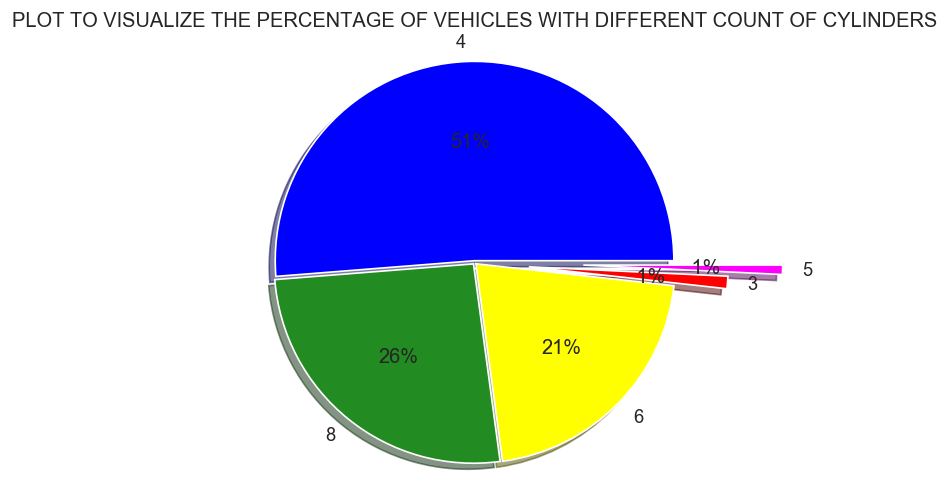

In [18]:
lbl=mpg['cyl'].value_counts().index.tolist()
per=mpg['cyl'].value_counts().values.tolist()
exp=(0.01,0.01,0.01,0.3,0.6)
clr=('blue','forestgreen','yellow','red','fuchsia')
plt.figure(figsize=(19,5),dpi=120)
sns.set_context('talk',font_scale=0.01)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.0f%%',pctdistance=0.6, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF VEHICLES WITH DIFFERENT COUNT OF CYLINDERS')
plt.show()

In [19]:
mpg['mfg_y'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: mfg_y, dtype: int64

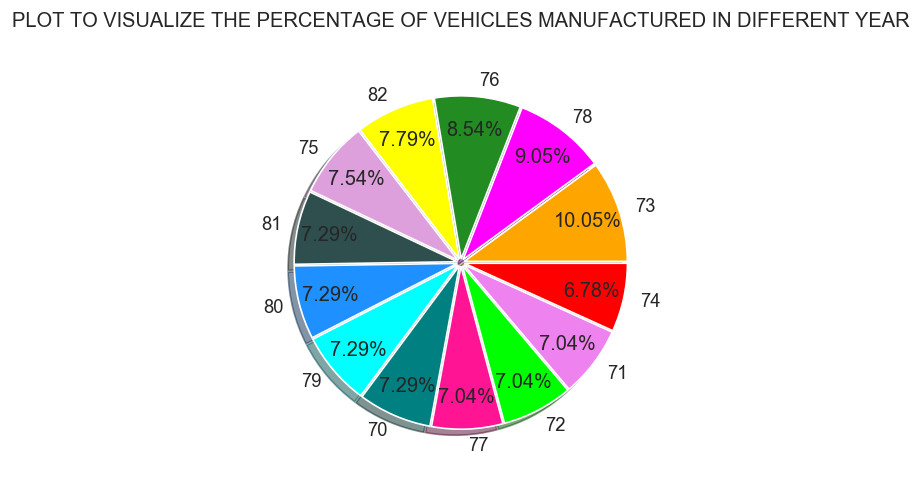

In [20]:
lbl=mpg['mfg_y'].value_counts().index.tolist()
per=mpg['mfg_y'].value_counts().values.tolist()
exp=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)
clr=('orange','magenta','forestgreen','yellow','plum','darkslategrey','dodgerblue','cyan','teal','deeppink','lime','violet','red')
plt.figure(figsize=(19,5),dpi=120)
sns.set_context('talk',font_scale=0.2)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.8, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF VEHICLES MANUFACTURED IN DIFFERENT YEAR')
plt.show()

In [21]:
mpg['ori'].value_counts()

1    249
3     79
2     70
Name: ori, dtype: int64

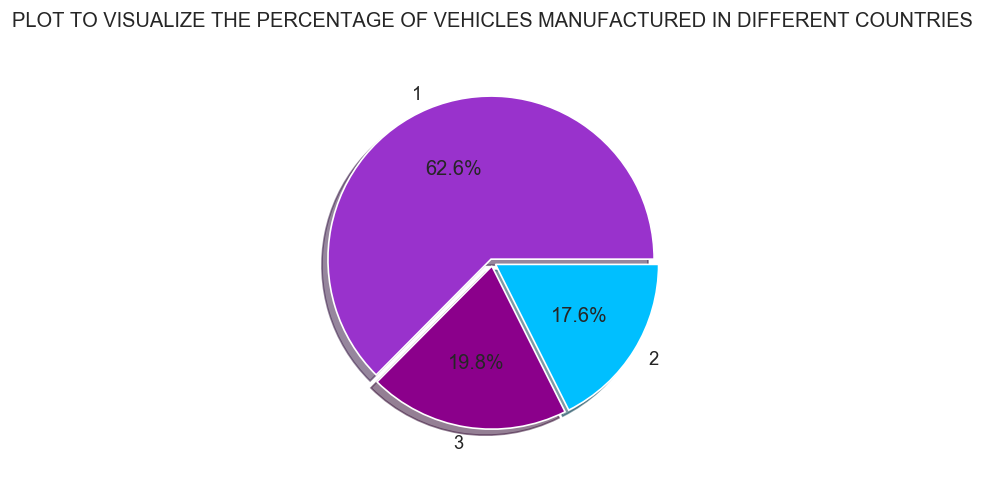

In [22]:
lbl=mpg['ori'].value_counts().index.tolist()
per=mpg['ori'].value_counts().values.tolist()
exp=(0.02,0.02,0.02)
clr=('darkorchid','darkmagenta','deepskyblue')
plt.figure(figsize=(19,5),dpi=120)
sns.set_context('talk',font_scale=0.2)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.1f%%',pctdistance=0.6, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF VEHICLES MANUFACTURED IN DIFFERENT COUNTRIES')
plt.show()

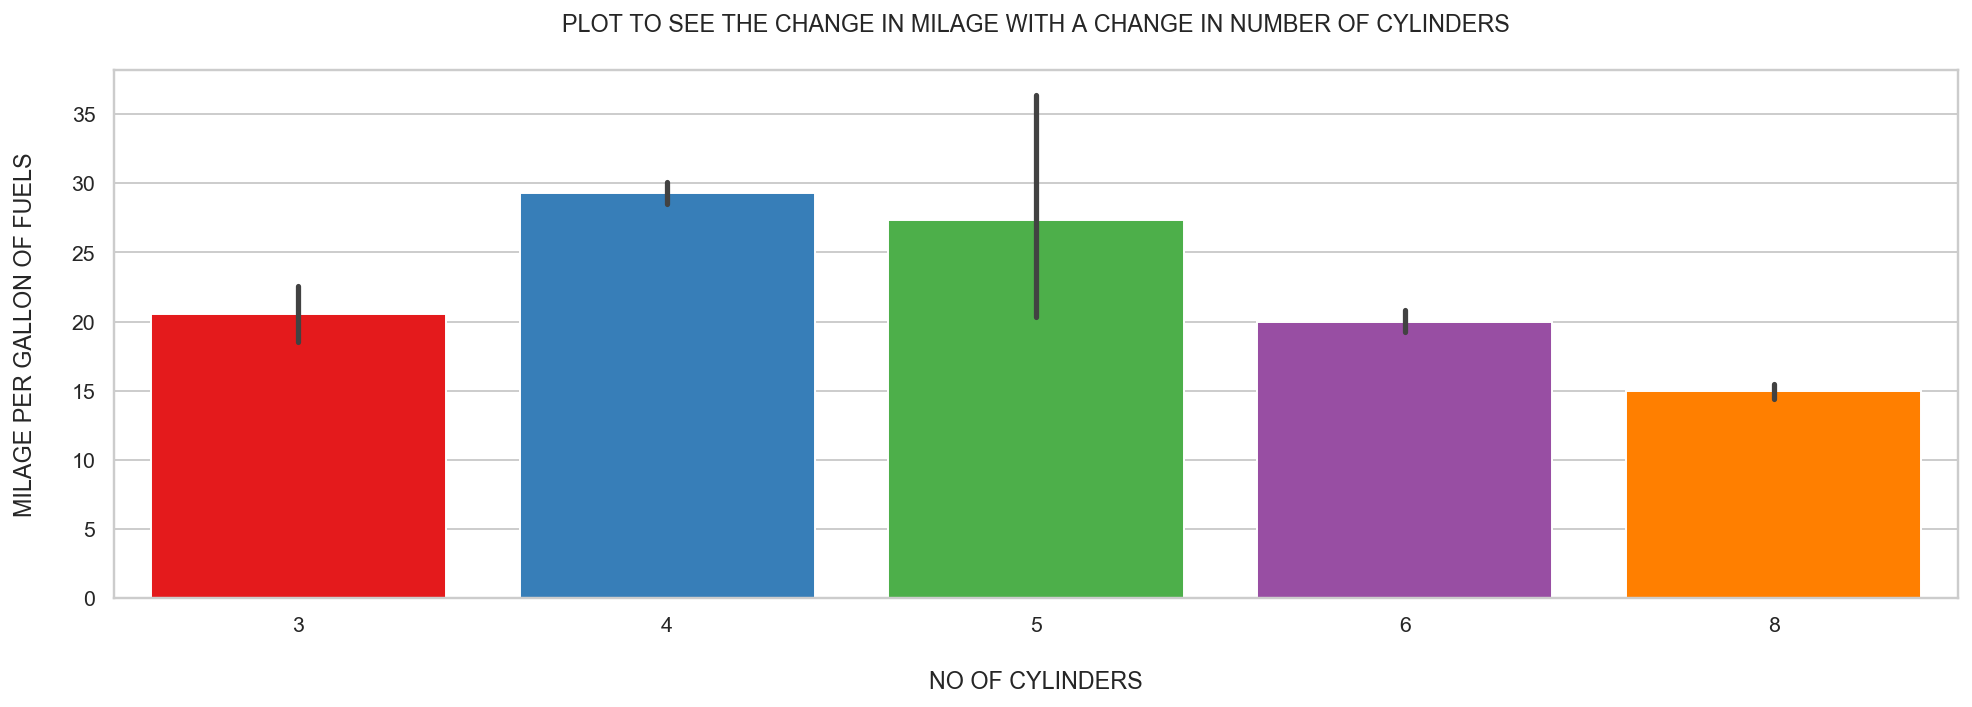

In [23]:
plt.figure(figsize=(17,5),dpi=140)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.barplot(x='cyl',y='milage',data=mpg,ci=95,orient='v',palette='Set1',saturation=25,errcolor='.26',errwidth=None)
plt.xlabel('\nNO OF CYLINDERS')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WITH A CHANGE IN NUMBER OF CYLINDERS\n')
plt.show()

                                VEHICLES WITH 4 CYLINDER PROVIDES BATTER MILAGE

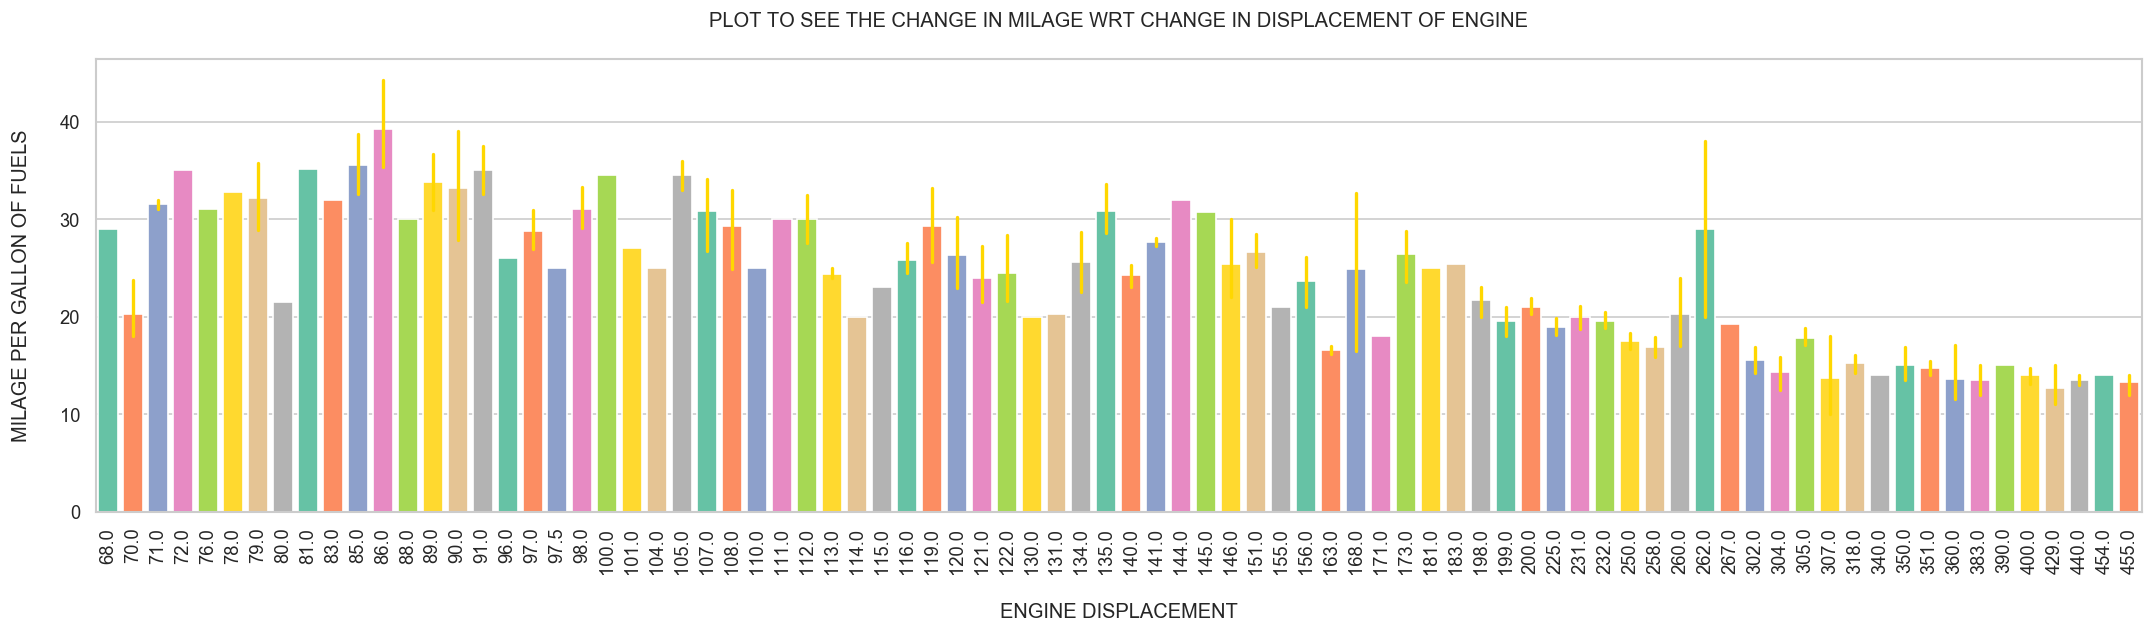

In [24]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
m1=sns.barplot(x='disp',y='milage',data=mpg,ci=95,orient='v',palette='Set2',saturation=25,errcolor='gold',errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('\nENGINE DISPLACEMENT')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WRT CHANGE IN DISPLACEMENT OF ENGINE\n')
plt.show()

                        86cc ENGINE PROVIDES THE BEST MILAGE AS COMPARED TO OTHERS

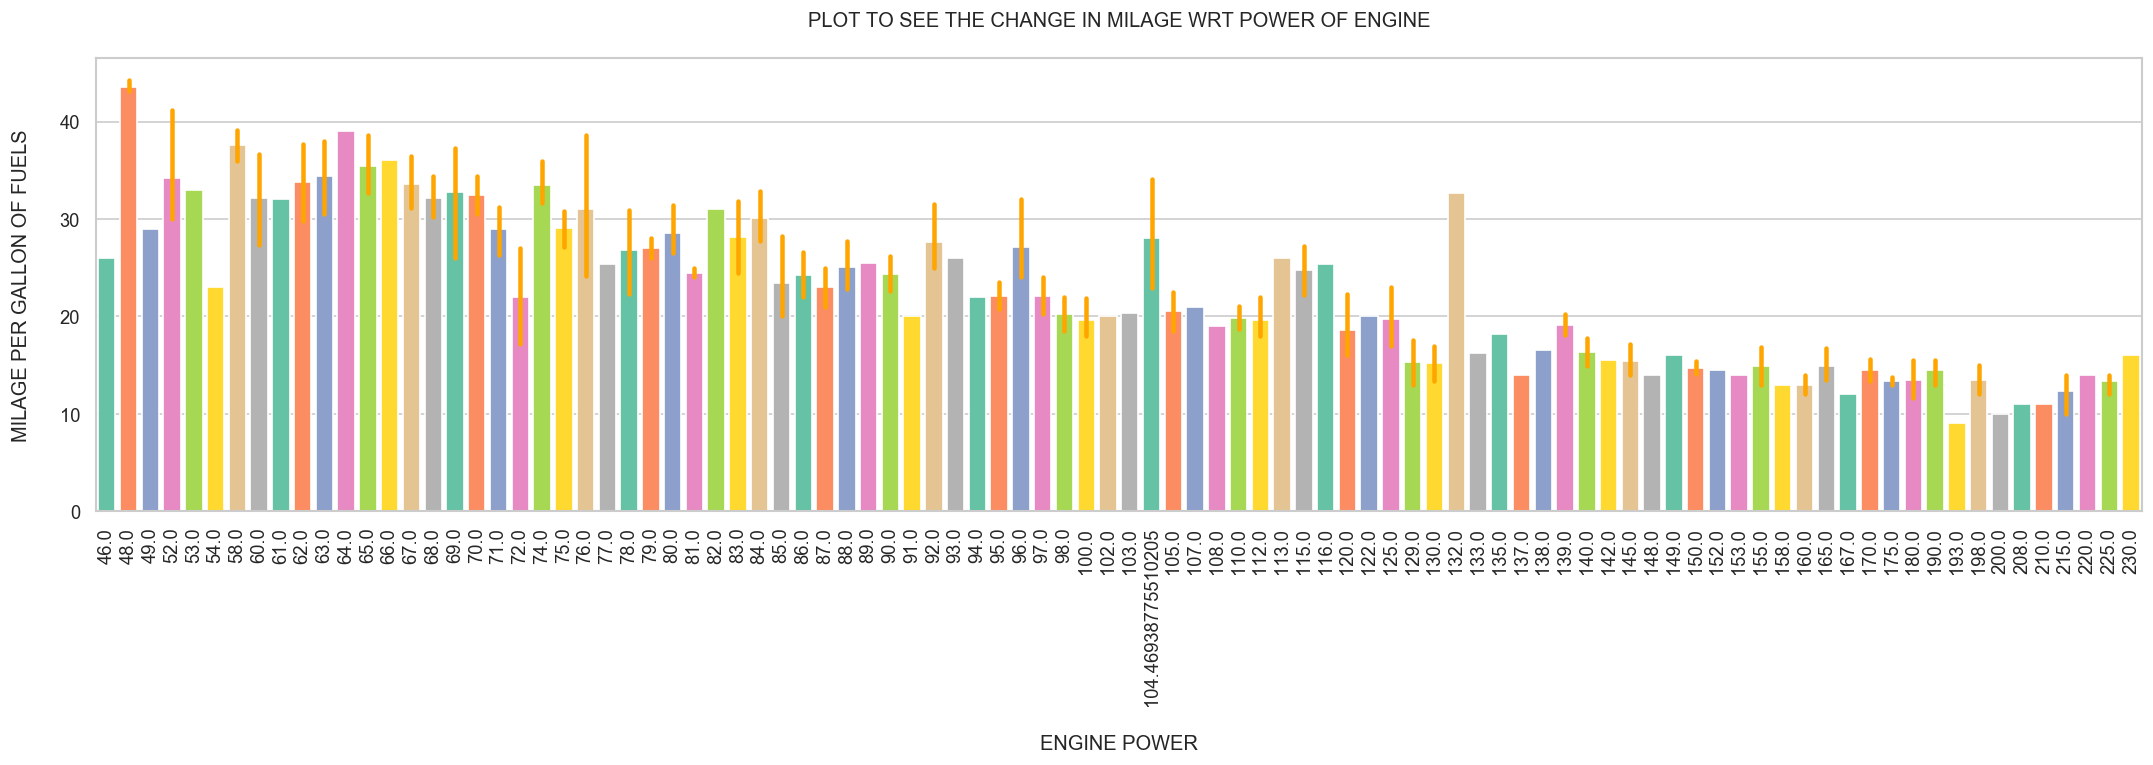

In [25]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
m1=sns.barplot(x='hp',y='milage',data=mpg,ci=95,orient='v',palette='Set2',saturation=25,errcolor='orange')
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('\nENGINE POWER')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WRT POWER OF ENGINE\n')
plt.show()

                                            ENGINE WITH LOW HP GIVES BATTER MILAGE

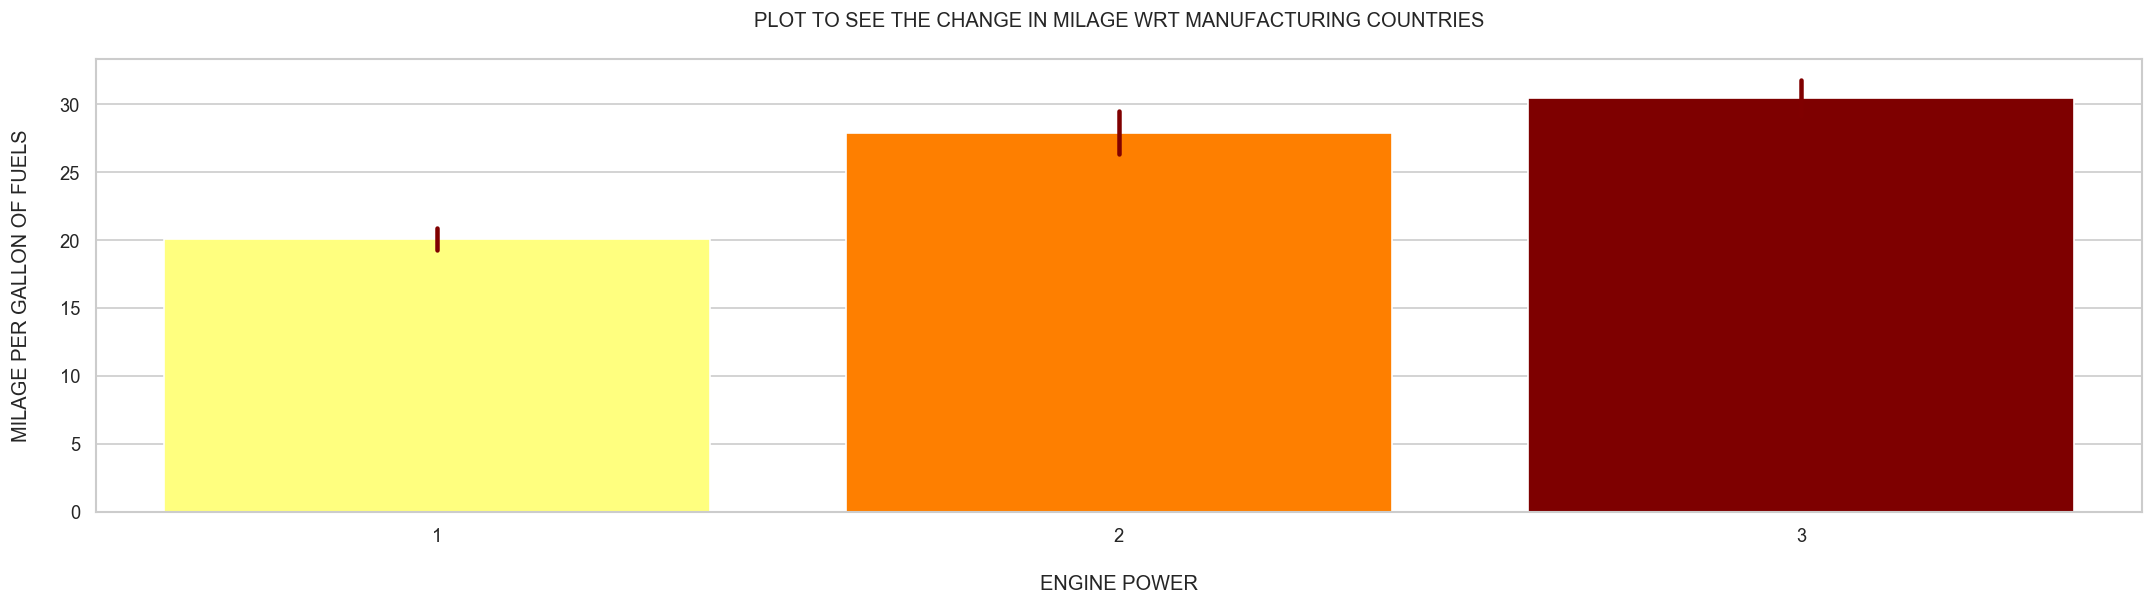

In [26]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.barplot(x='ori',y='milage',data=mpg,ci=95,orient='v',palette='afmhot_r',saturation=25,errcolor='maroon',errwidth=2.7)
plt.xlabel('\nENGINE POWER')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WRT MANUFACTURING COUNTRIES\n ')
plt.show()

                                VEHICLE OF COUNTRY_3 GIVES HIGHER MILAGE

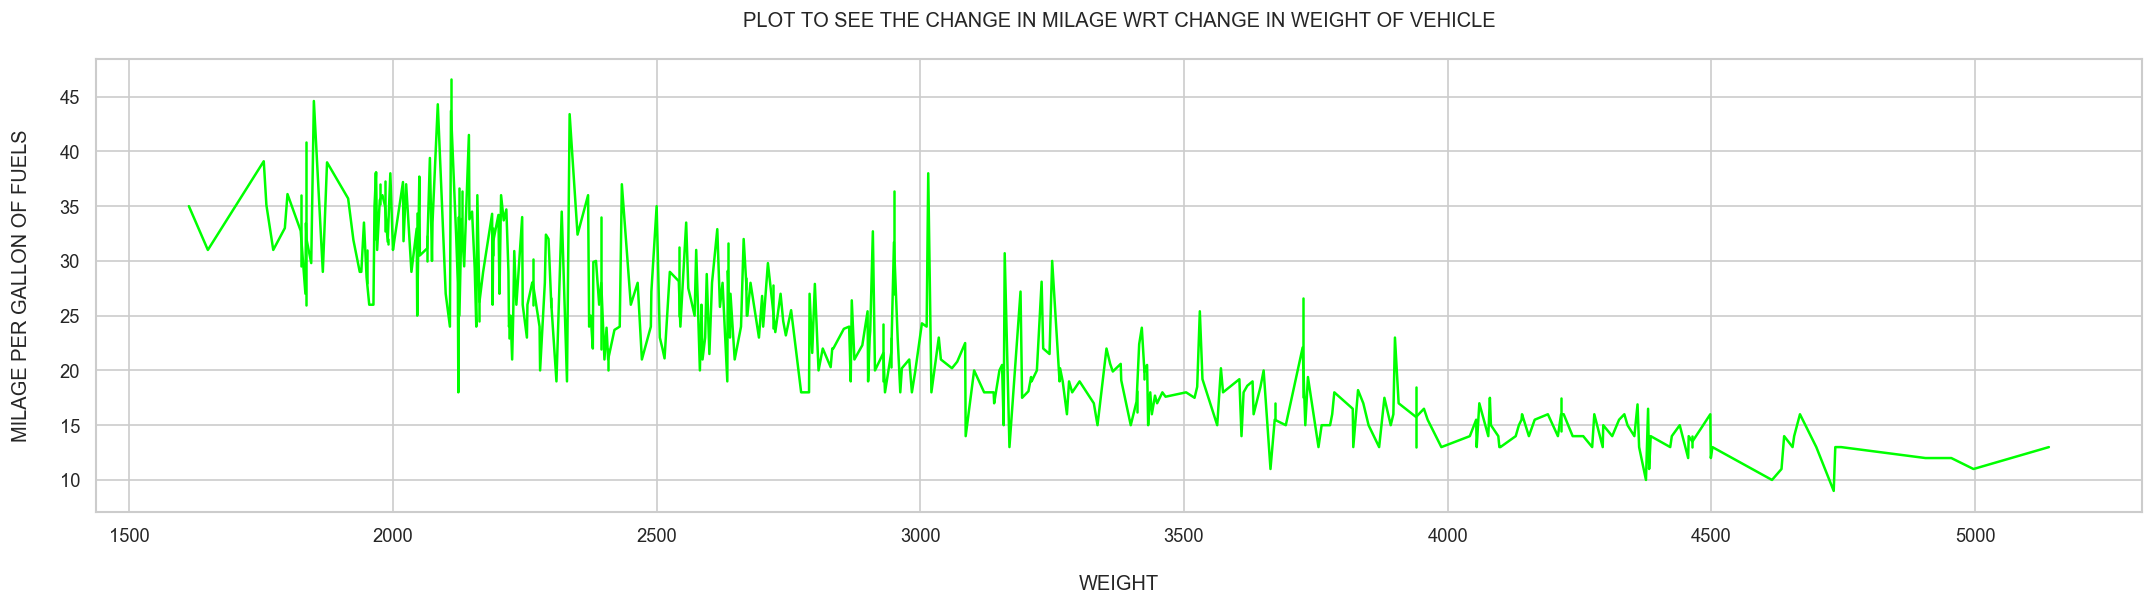

In [27]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='wg',y='milage',data=mpg,color='lime',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nWEIGHT')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WRT CHANGE IN WEIGHT OF VEHICLE\n')
plt.show()

                                        A WEIGHT ABOVE 2500POUND RESULTS IN LOW MILAGE

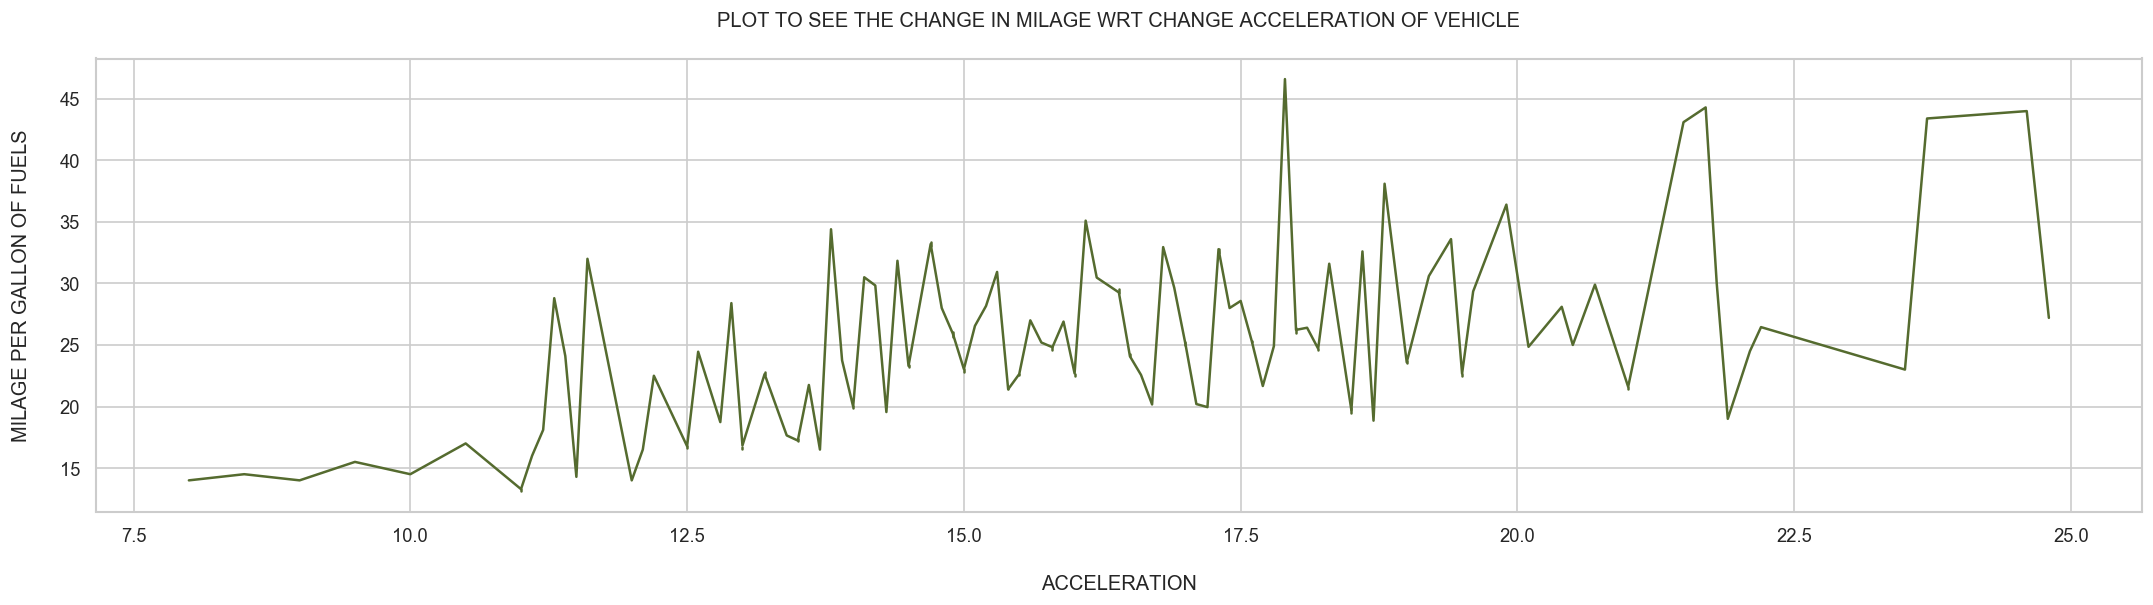

In [28]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='acc',y='milage',data=mpg,color='darkolivegreen',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nACCELERATION')
plt.ylabel('MILAGE PER GALLON OF FUELS\n')
plt.title('PLOT TO SEE THE CHANGE IN MILAGE WRT CHANGE ACCELERATION OF VEHICLE\n')
plt.show()

                                 AN ACCELERATION OF APPROXIMATELY 19FT/S^2 GIVES HIGHER MILAGE

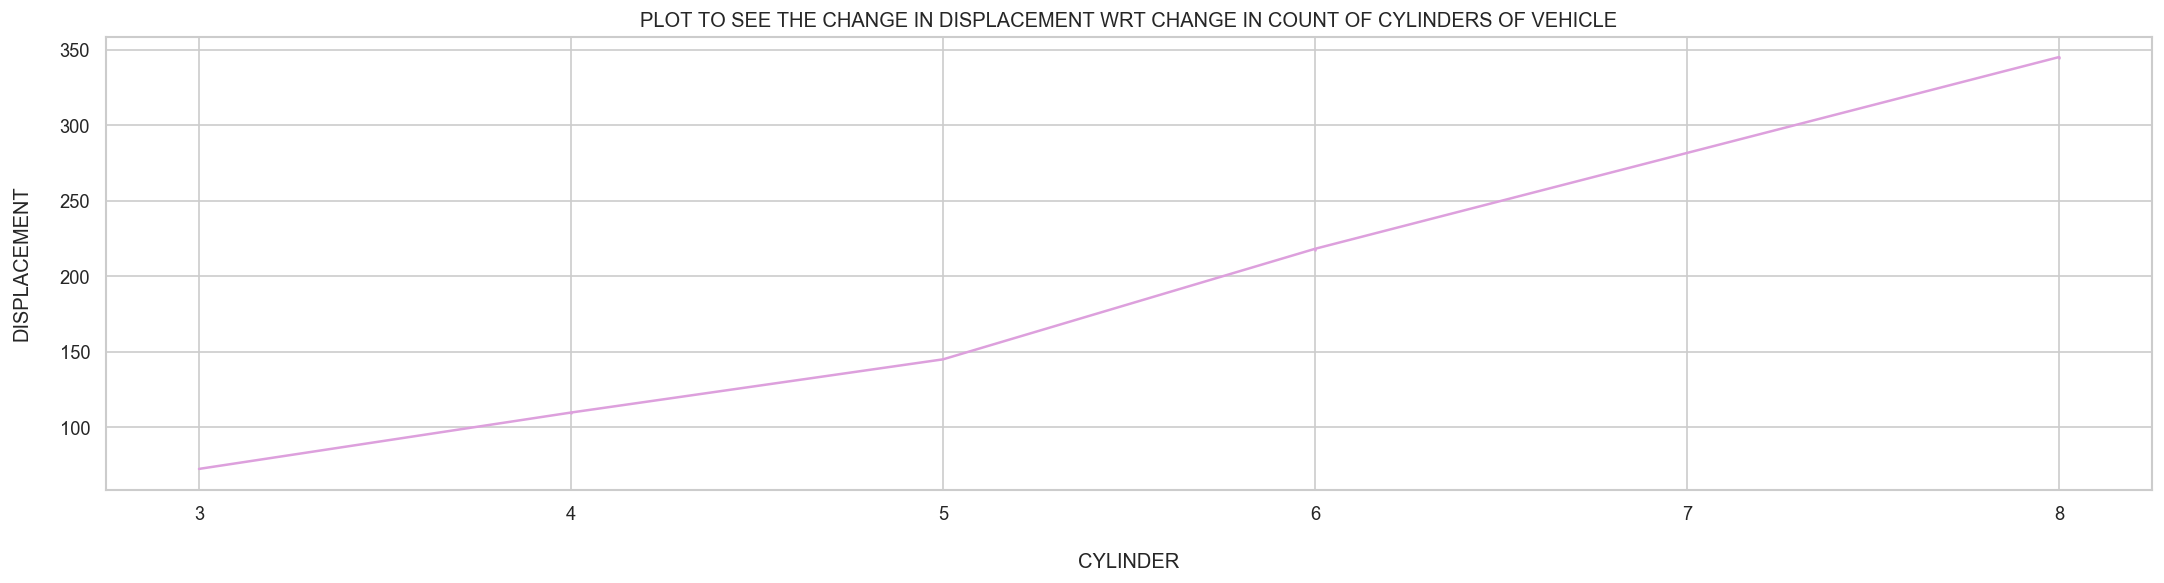

In [29]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='cyl',y='disp',data=mpg,color='plum',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nCYLINDER')
plt.ylabel('DISPLACEMENT\n')
plt.title('PLOT TO SEE THE CHANGE IN DISPLACEMENT WRT CHANGE IN COUNT OF CYLINDERS OF VEHICLE')
plt.show()

             A HIGHER  RATE OF DISPLACEMENT IS ACHIVED THROUGH ENGINE WITH HIGHER COUNT OF CYLINDERS 

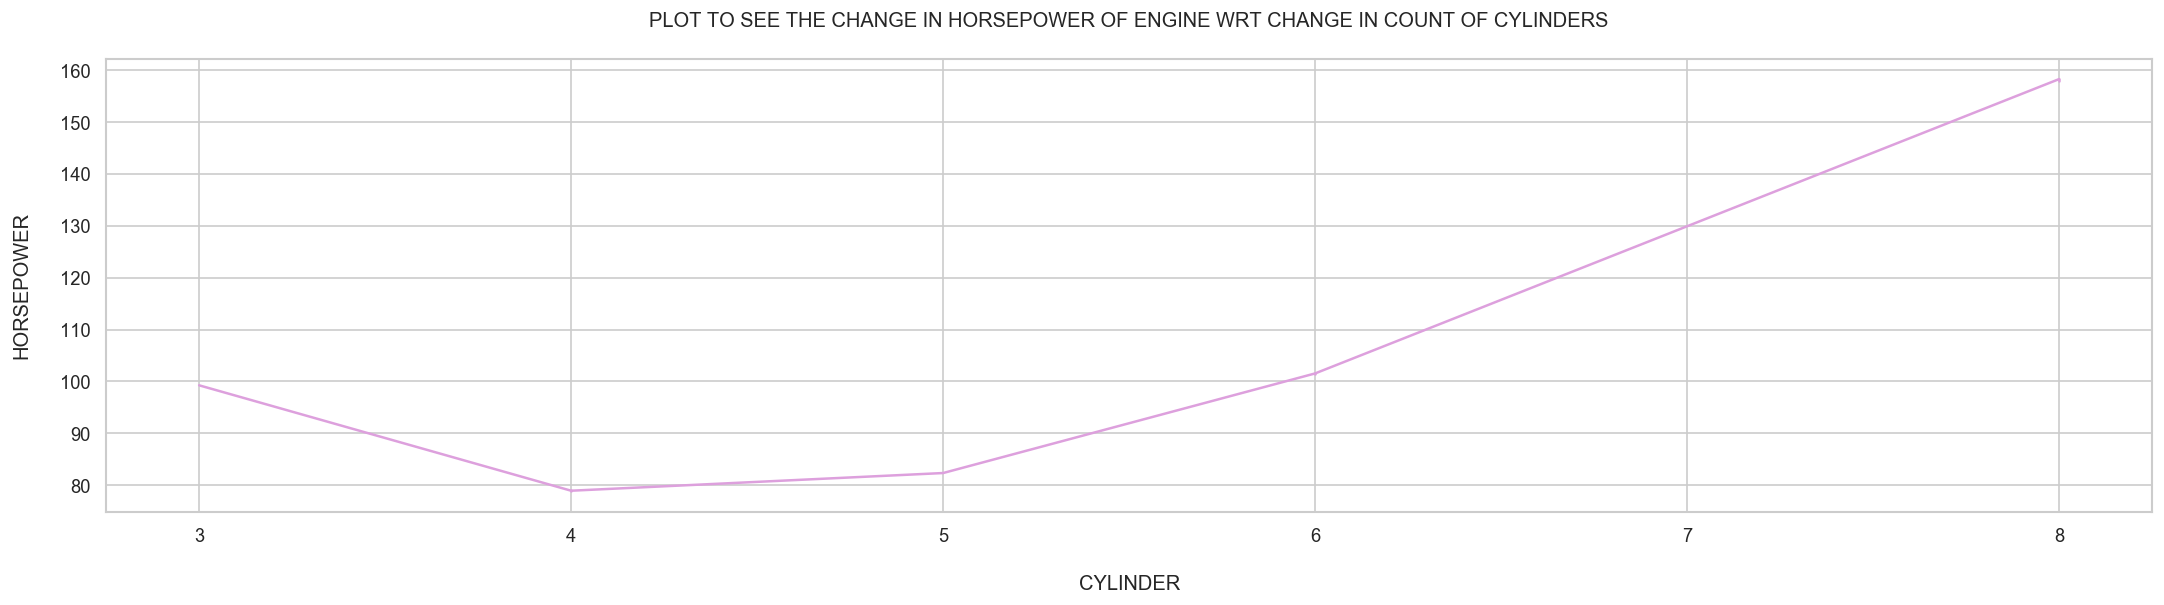

In [30]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='cyl',y='hp',data=mpg,color='plum',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nCYLINDER')
plt.ylabel('HORSEPOWER\n')
plt.title('PLOT TO SEE THE CHANGE IN HORSEPOWER OF ENGINE WRT CHANGE IN COUNT OF CYLINDERS\n')
plt.show()

                        HIGH HORSEPOWER IS ACHIVE FROM VEHICLES WITH MORE THAN 6 CYLINDERS

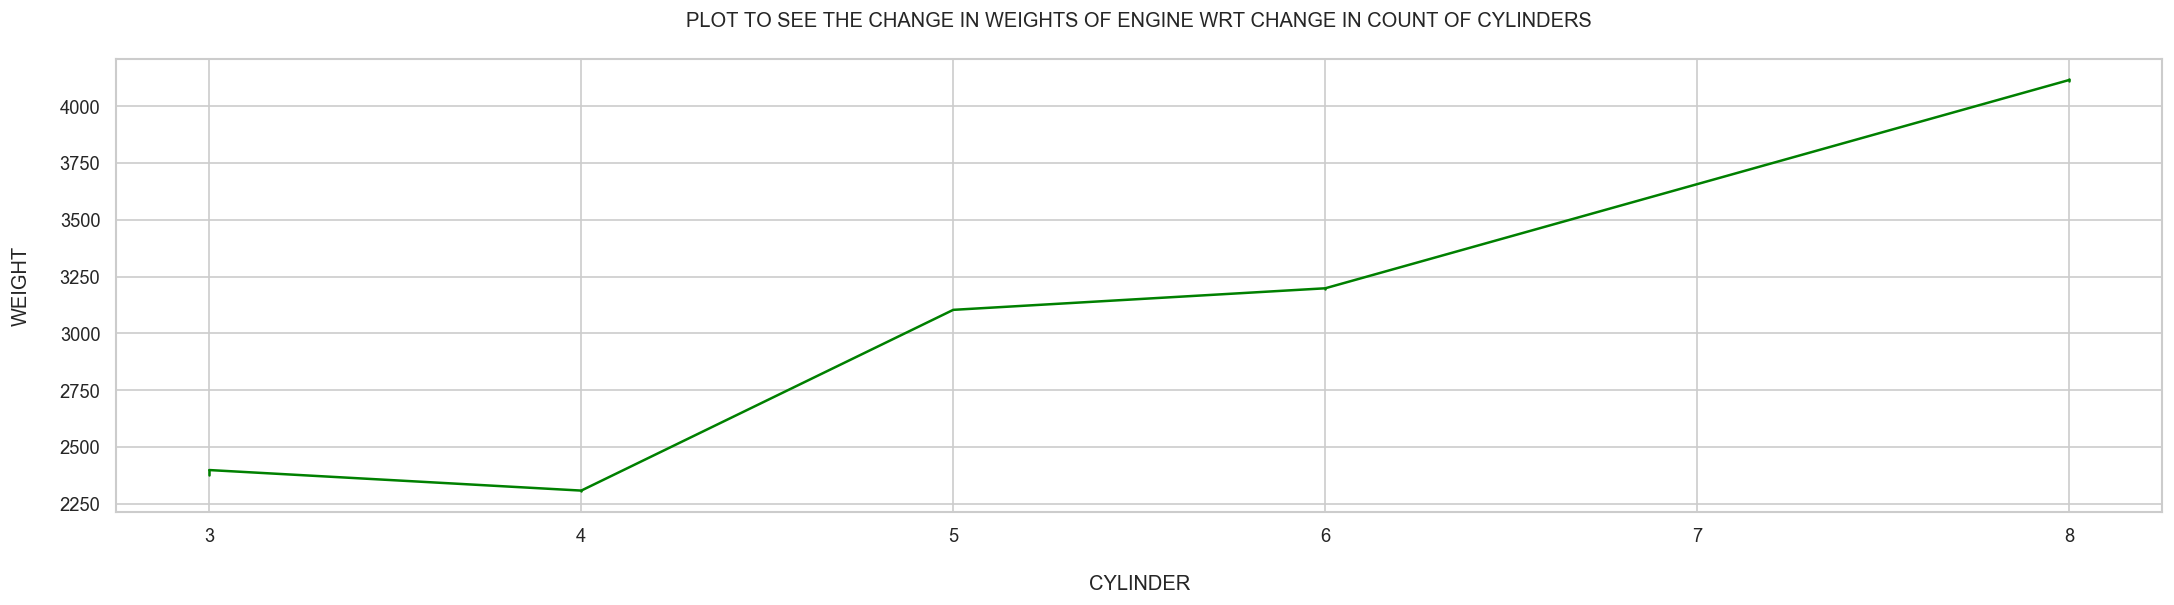

In [31]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='cyl',y='wg',data=mpg,color='green',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nCYLINDER')
plt.ylabel('WEIGHT\n')
plt.title('PLOT TO SEE THE CHANGE IN WEIGHTS OF ENGINE WRT CHANGE IN COUNT OF CYLINDERS\n')
plt.show()

                        INCREASE IN NUMBERS OF CYLINDER INCREASES THE WEIGHT OF VEHICLES

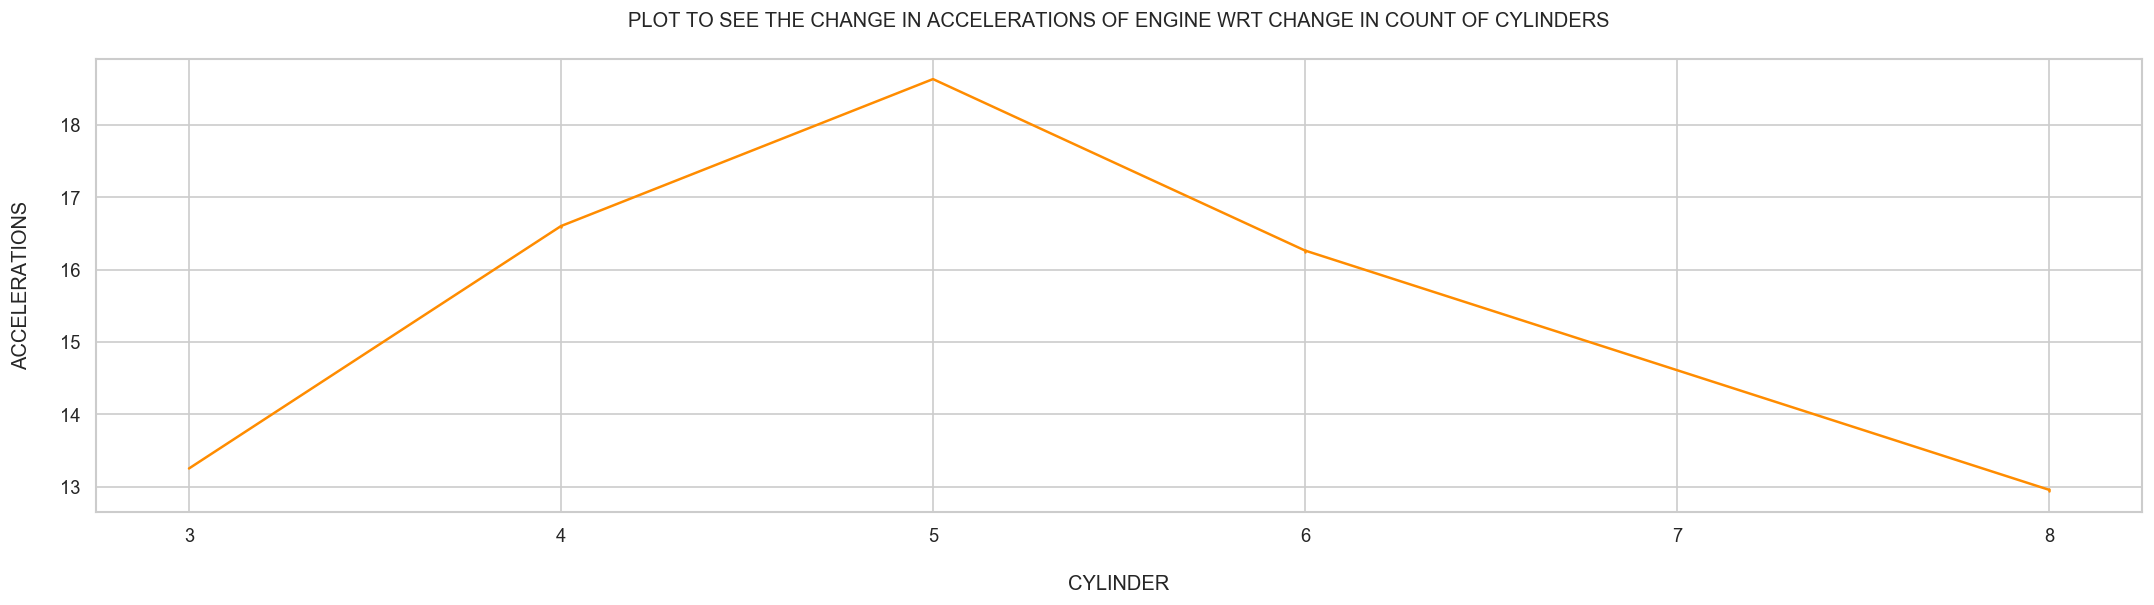

In [32]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='cyl',y='acc',data=mpg,color='darkorange',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nCYLINDER')
plt.ylabel('ACCELERATIONS\n')
plt.title('PLOT TO SEE THE CHANGE IN ACCELERATIONS OF ENGINE WRT CHANGE IN COUNT OF CYLINDERS\n')
plt.show()

                                HIGHER NUMBER CYLINDER REDUCES THE ACCELERATIONS

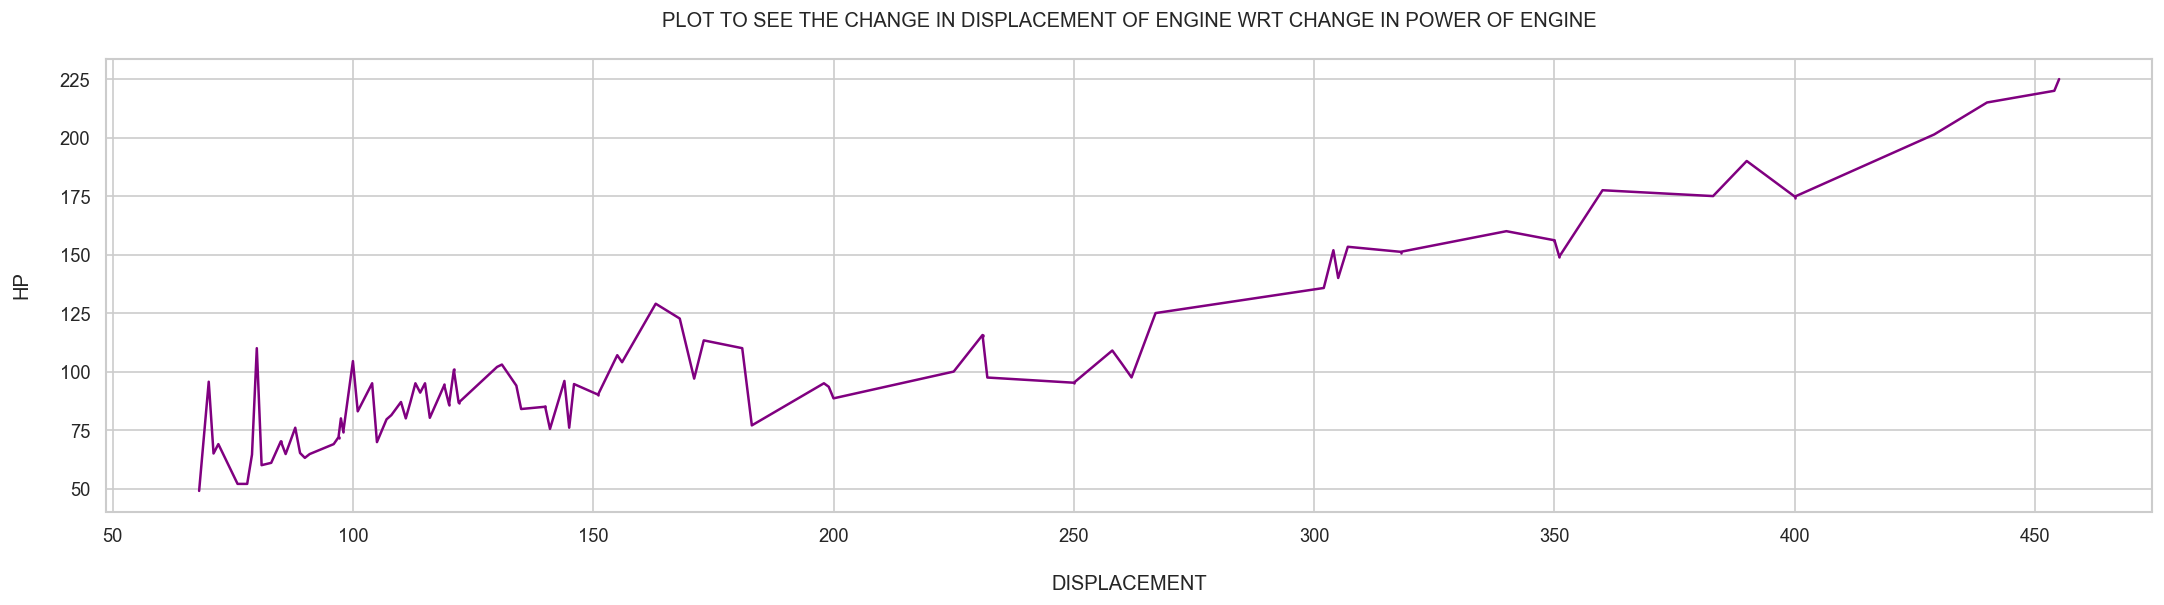

In [33]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='disp',y='hp',data=mpg,color='purple',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nDISPLACEMENT')
plt.ylabel('HP\n')
plt.title('PLOT TO SEE THE CHANGE IN DISPLACEMENT OF ENGINE WRT CHANGE IN POWER OF ENGINE\n')
plt.show()

                            A HIGHER DISPLACEMENT RATE GENERATES HIGHER POWER

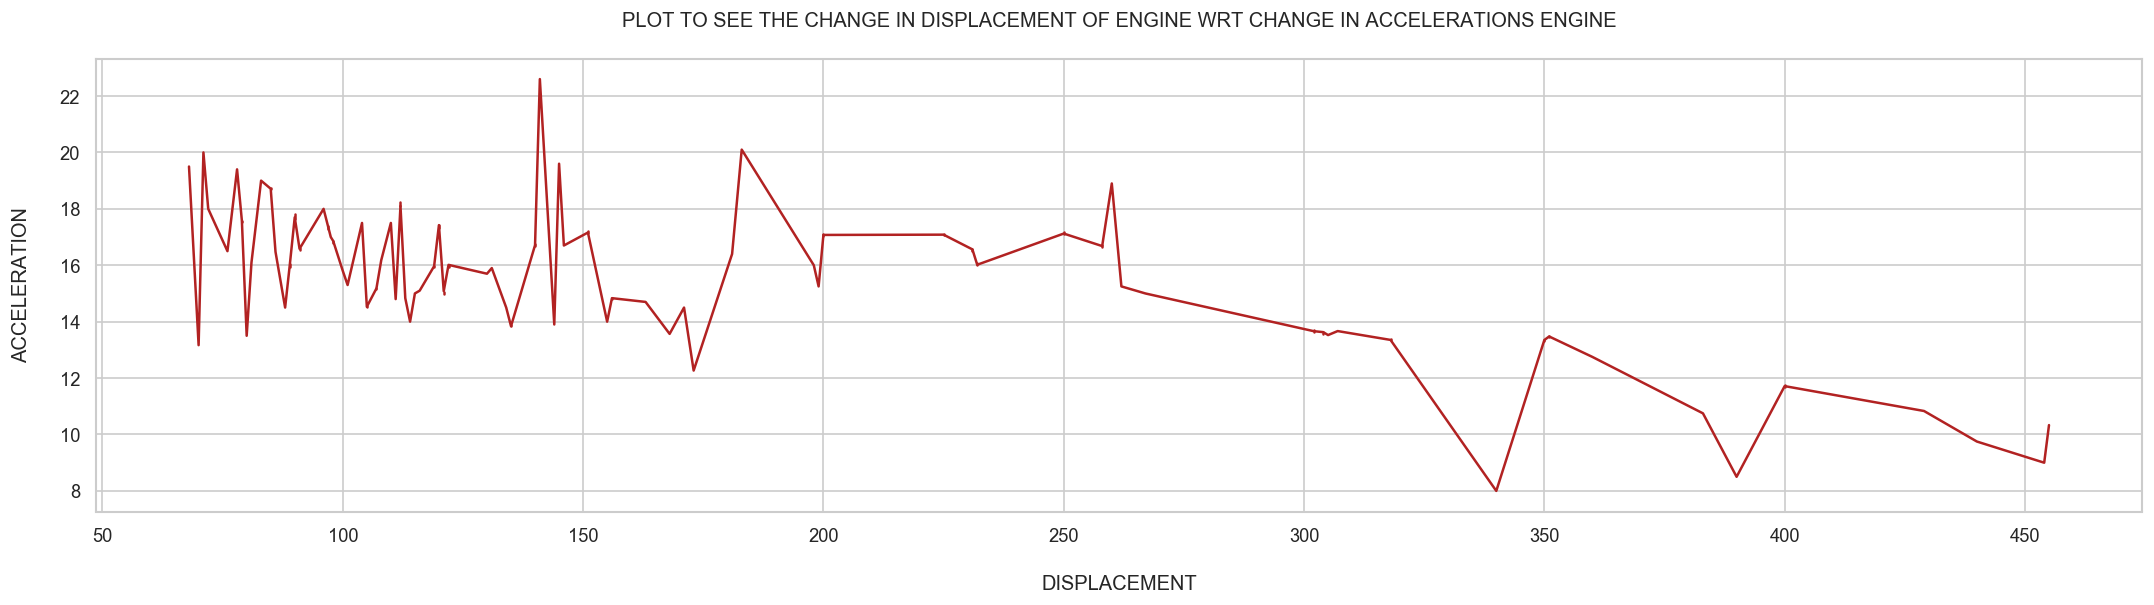

In [34]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='disp',y='acc',data=mpg,color='firebrick',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nDISPLACEMENT')
plt.ylabel('ACCELERATION\n')
plt.title('PLOT TO SEE THE CHANGE IN DISPLACEMENT OF ENGINE WRT CHANGE IN ACCELERATIONS ENGINE\n')
plt.show()

                             A DISPLACEMENT RATE OF AROUND 130CC GIVES HIGHER ACCELERATIONS

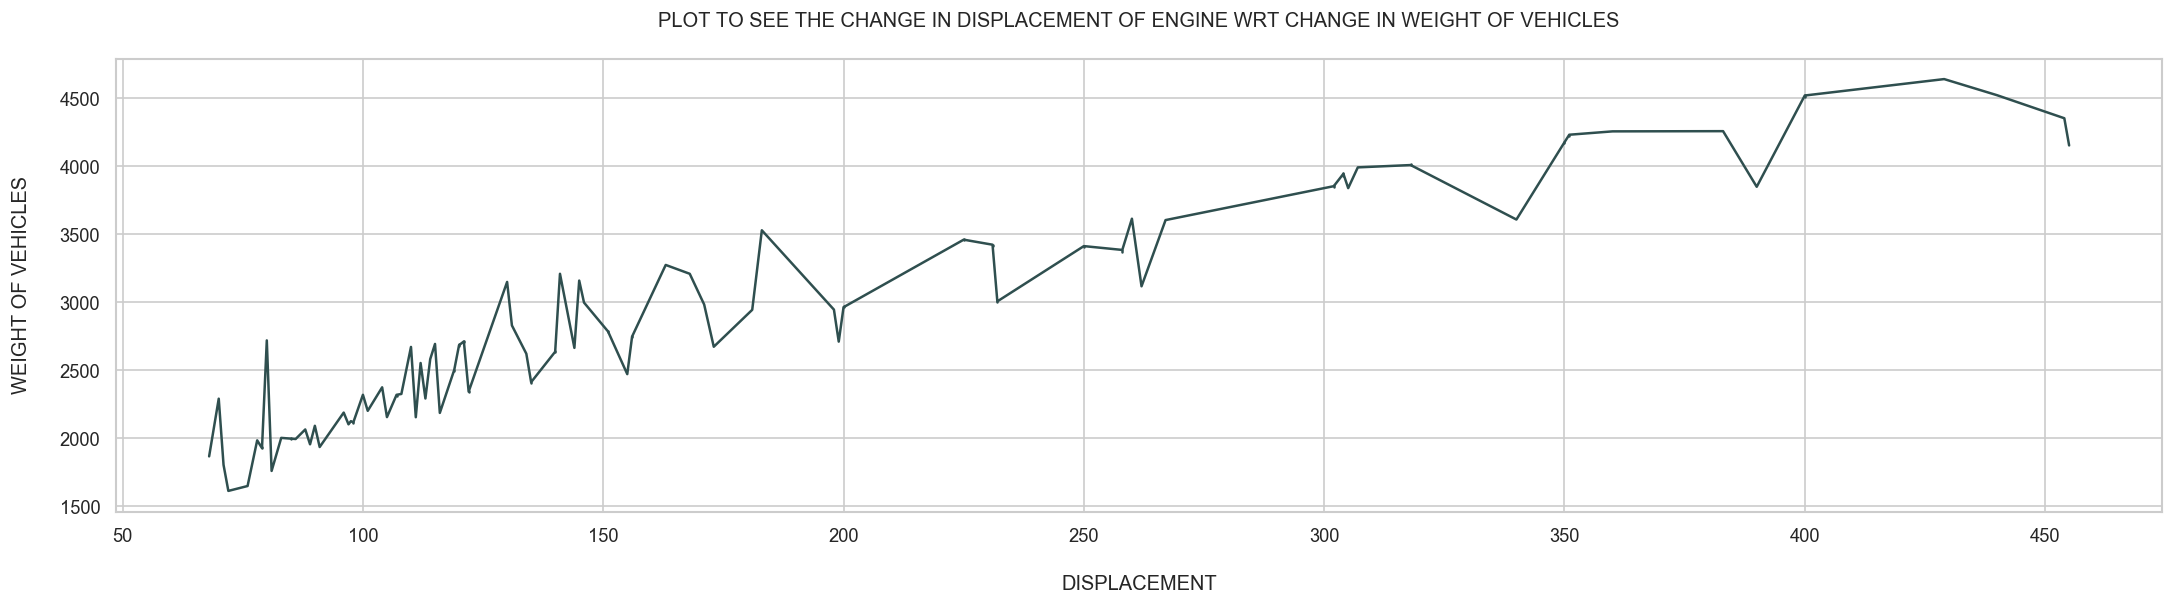

In [35]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='disp',y='wg',data=mpg,color='darkslategrey',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nDISPLACEMENT')
plt.ylabel('WEIGHT OF VEHICLES\n')
plt.title('PLOT TO SEE THE CHANGE IN DISPLACEMENT OF ENGINE WRT CHANGE IN WEIGHT OF VEHICLES\n')
plt.show()

                                    VEHICLES WITH HIGH DISPLACEMENT RATE ARE HEAVIER 

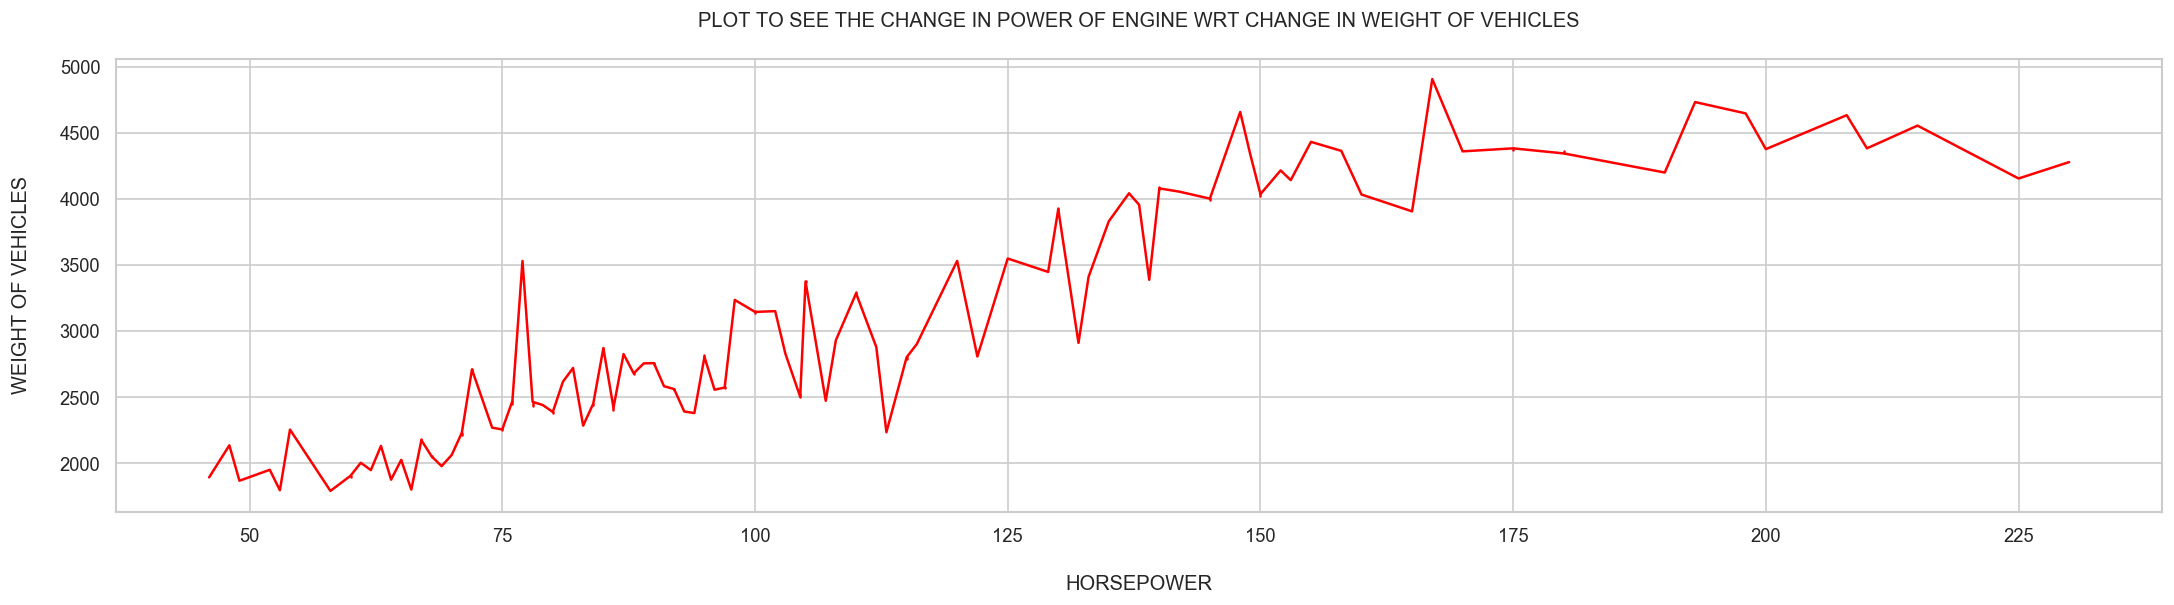

In [36]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='hp',y='wg',data=mpg,color='red',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nHORSEPOWER')
plt.ylabel('WEIGHT OF VEHICLES\n')
plt.title('PLOT TO SEE THE CHANGE IN POWER OF ENGINE WRT CHANGE IN WEIGHT OF VEHICLES\n')
plt.show()

                                    A HIGHER DISPLACEMENT RATE GENERATES HIGH POWER

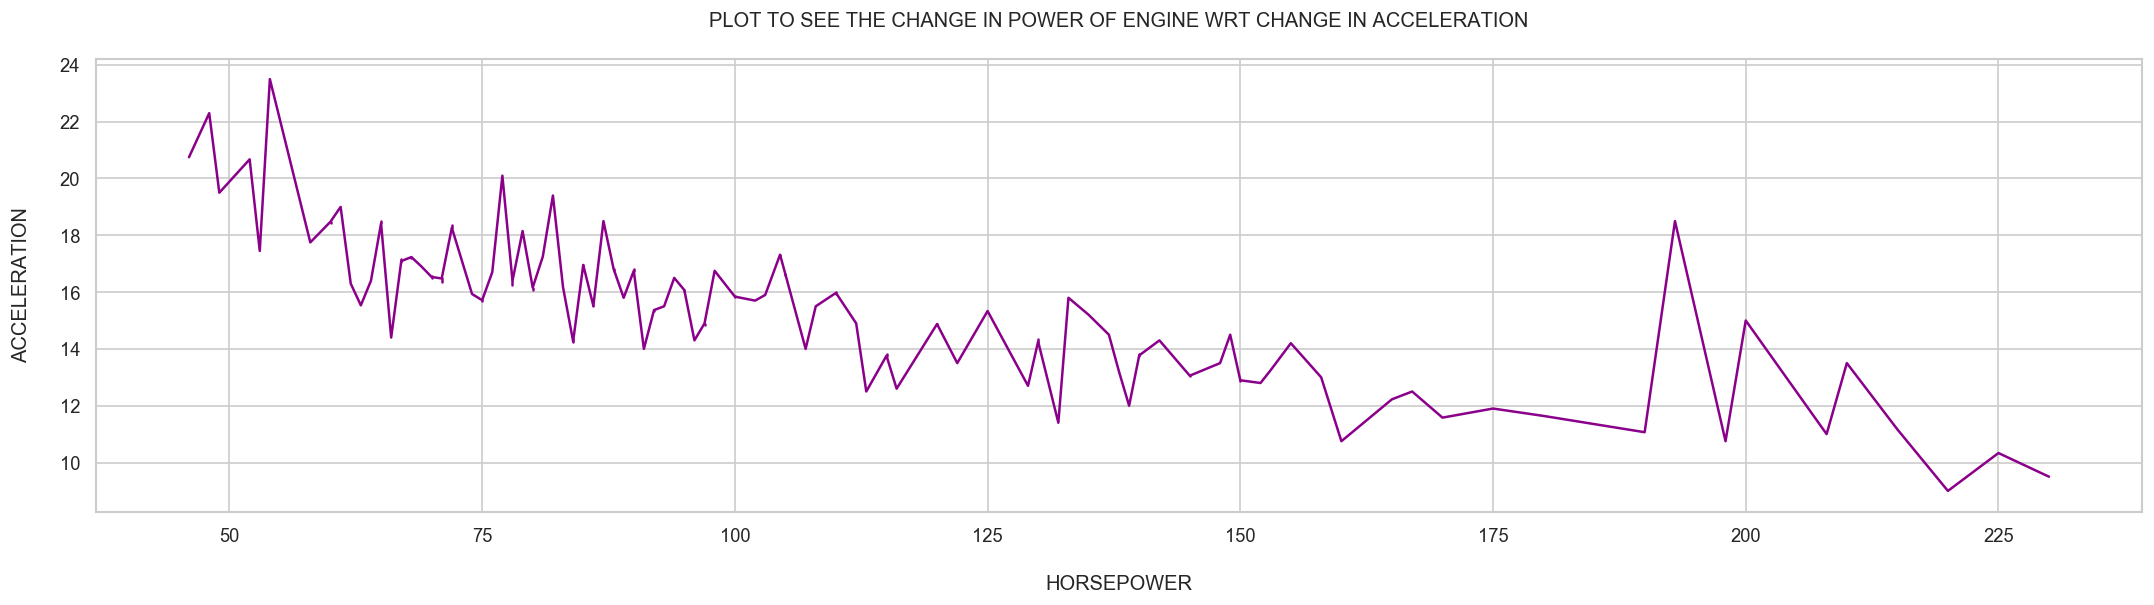

In [37]:
plt.figure(figsize=(22,5),dpi=120)
sns.set_context('talk',font_scale=0.8)
sns.set(style='whitegrid')
sns.lineplot(x='hp',y='acc',data=mpg,color='darkmagenta',dashes=True,estimator='mean',ci=5,sort=True,err_style='bars',legend='brief')
plt.xlabel('\nHORSEPOWER')
plt.ylabel('ACCELERATION\n')
plt.title('PLOT TO SEE THE CHANGE IN POWER OF ENGINE WRT CHANGE IN ACCELERATION\n')
plt.show()

                        A VEHICLE WITH HIGHER HORSEPOWER RELATES TO LOW ACCELERATIONS

<Figure size 1440x360 with 0 Axes>

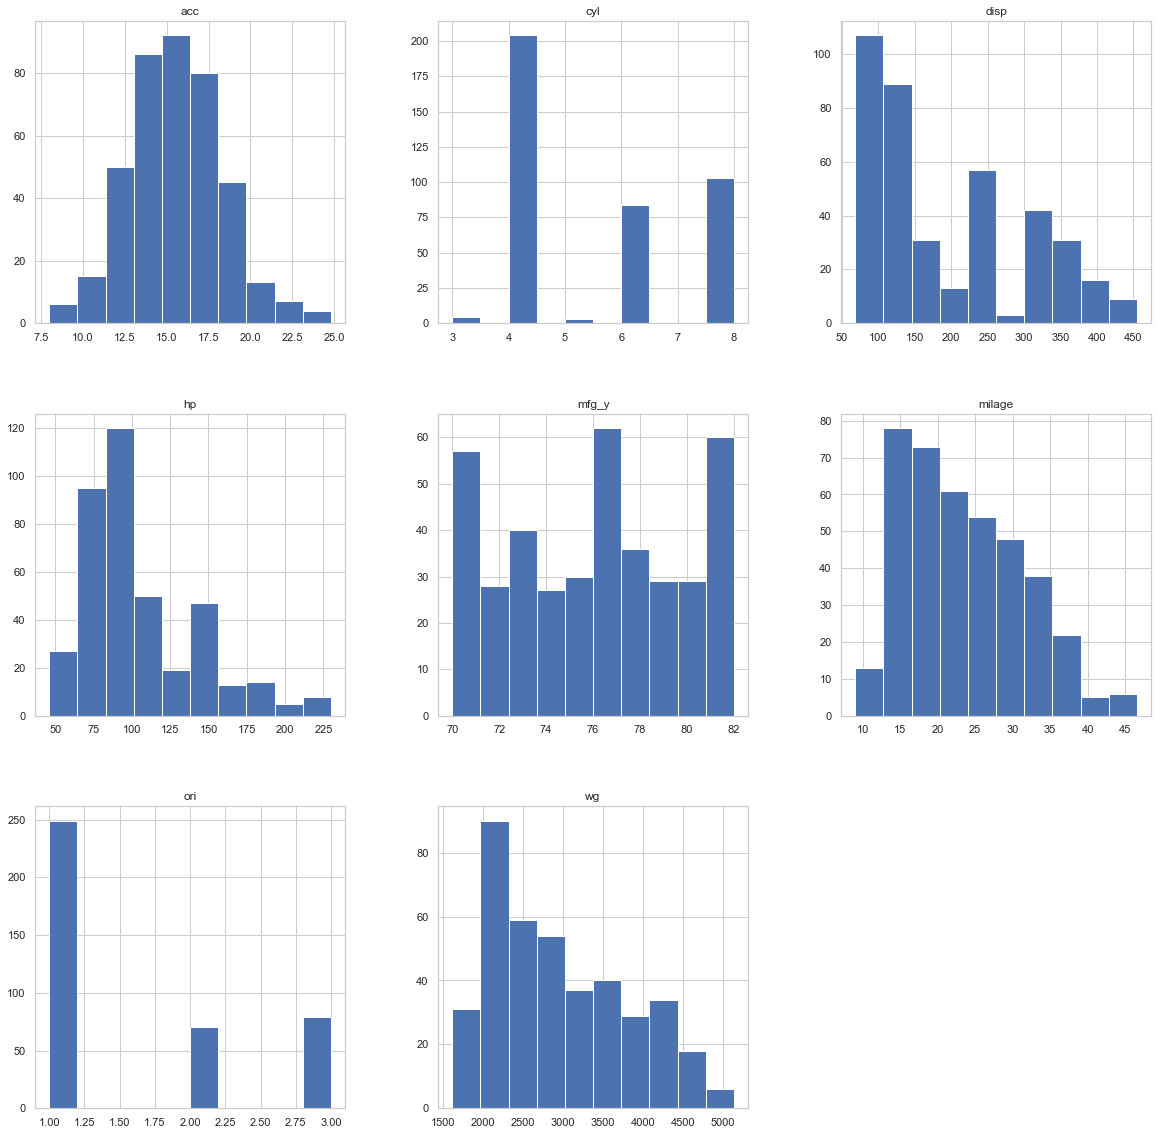

In [38]:
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
plt.figure(figsize=(12,3),dpi=120)
mpg.hist(figsize=(20,20),grid=True)
plt.show()

In [39]:
#dropping car_name column as it is not required
mpg.drop(['car'],axis=1,inplace=True)

In [40]:
cl=mpg.columns.values
cl

array(['milage', 'cyl', 'disp', 'hp', 'wg', 'acc', 'mfg_y', 'ori'],
      dtype=object)

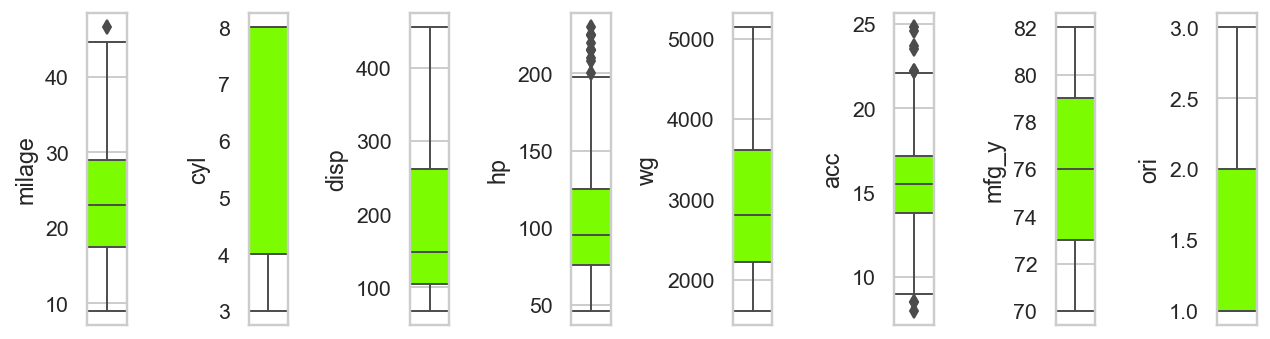

In [41]:
#boxplot to check outliers
plt.figure(figsize=(15,5),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,8):
    plt.subplot(2,13,i+1)
    sns.boxplot(mpg[cl[i]],orient='v',color='lawngreen',saturation=35,width=2.5,linewidth=1)
plt.tight_layout()

In [42]:
#removing outliers 
o=np.abs(zscore(mpg))
o

array([[0.7064387 , 1.49819126, 1.0906037 , ..., 1.29549834, 1.62742629,
        0.71514478],
       [1.09075062, 1.49819126, 1.5035143 , ..., 1.47703779, 1.62742629,
        0.71514478],
       [0.7064387 , 1.49819126, 1.19623199, ..., 1.65857724, 1.62742629,
        0.71514478],
       ...,
       [1.08701694, 0.85632057, 0.56103873, ..., 1.4407299 , 1.62198339,
        0.71514478],
       [0.57460104, 0.85632057, 0.70507731, ..., 1.10082237, 1.62198339,
        0.71514478],
       [0.95891297, 0.85632057, 0.71467988, ..., 1.39128549, 1.62198339,
        0.71514478]])

In [43]:
print(np.where(o>3))

(array([  6,   8,  13,  95, 116, 299, 394], dtype=int64), array([3, 3, 3, 3, 3, 5, 5], dtype=int64))


In [44]:
#checking few outliers
print(o[6][3],'\n',o[394][5],'\n',o[95][3])

3.0282326205181938 
 3.279295752576946 
 3.1592902061085413


In [45]:
#removing outliers
Mpg=mpg[(o<3).all(axis=1)]

In [46]:
print('Before outlier removal the shape was',mpg.shape,'\nAfter outliers removal the shape becomes',Mpg.shape,
     '\nTotal of',len(mpg)-len(Mpg),'rows were removed.')

Before outlier removal the shape was (398, 8) 
After outliers removal the shape becomes (391, 8) 
Total of 7 rows were removed.


In [47]:
#checking distribution
cl=Mpg.columns.values

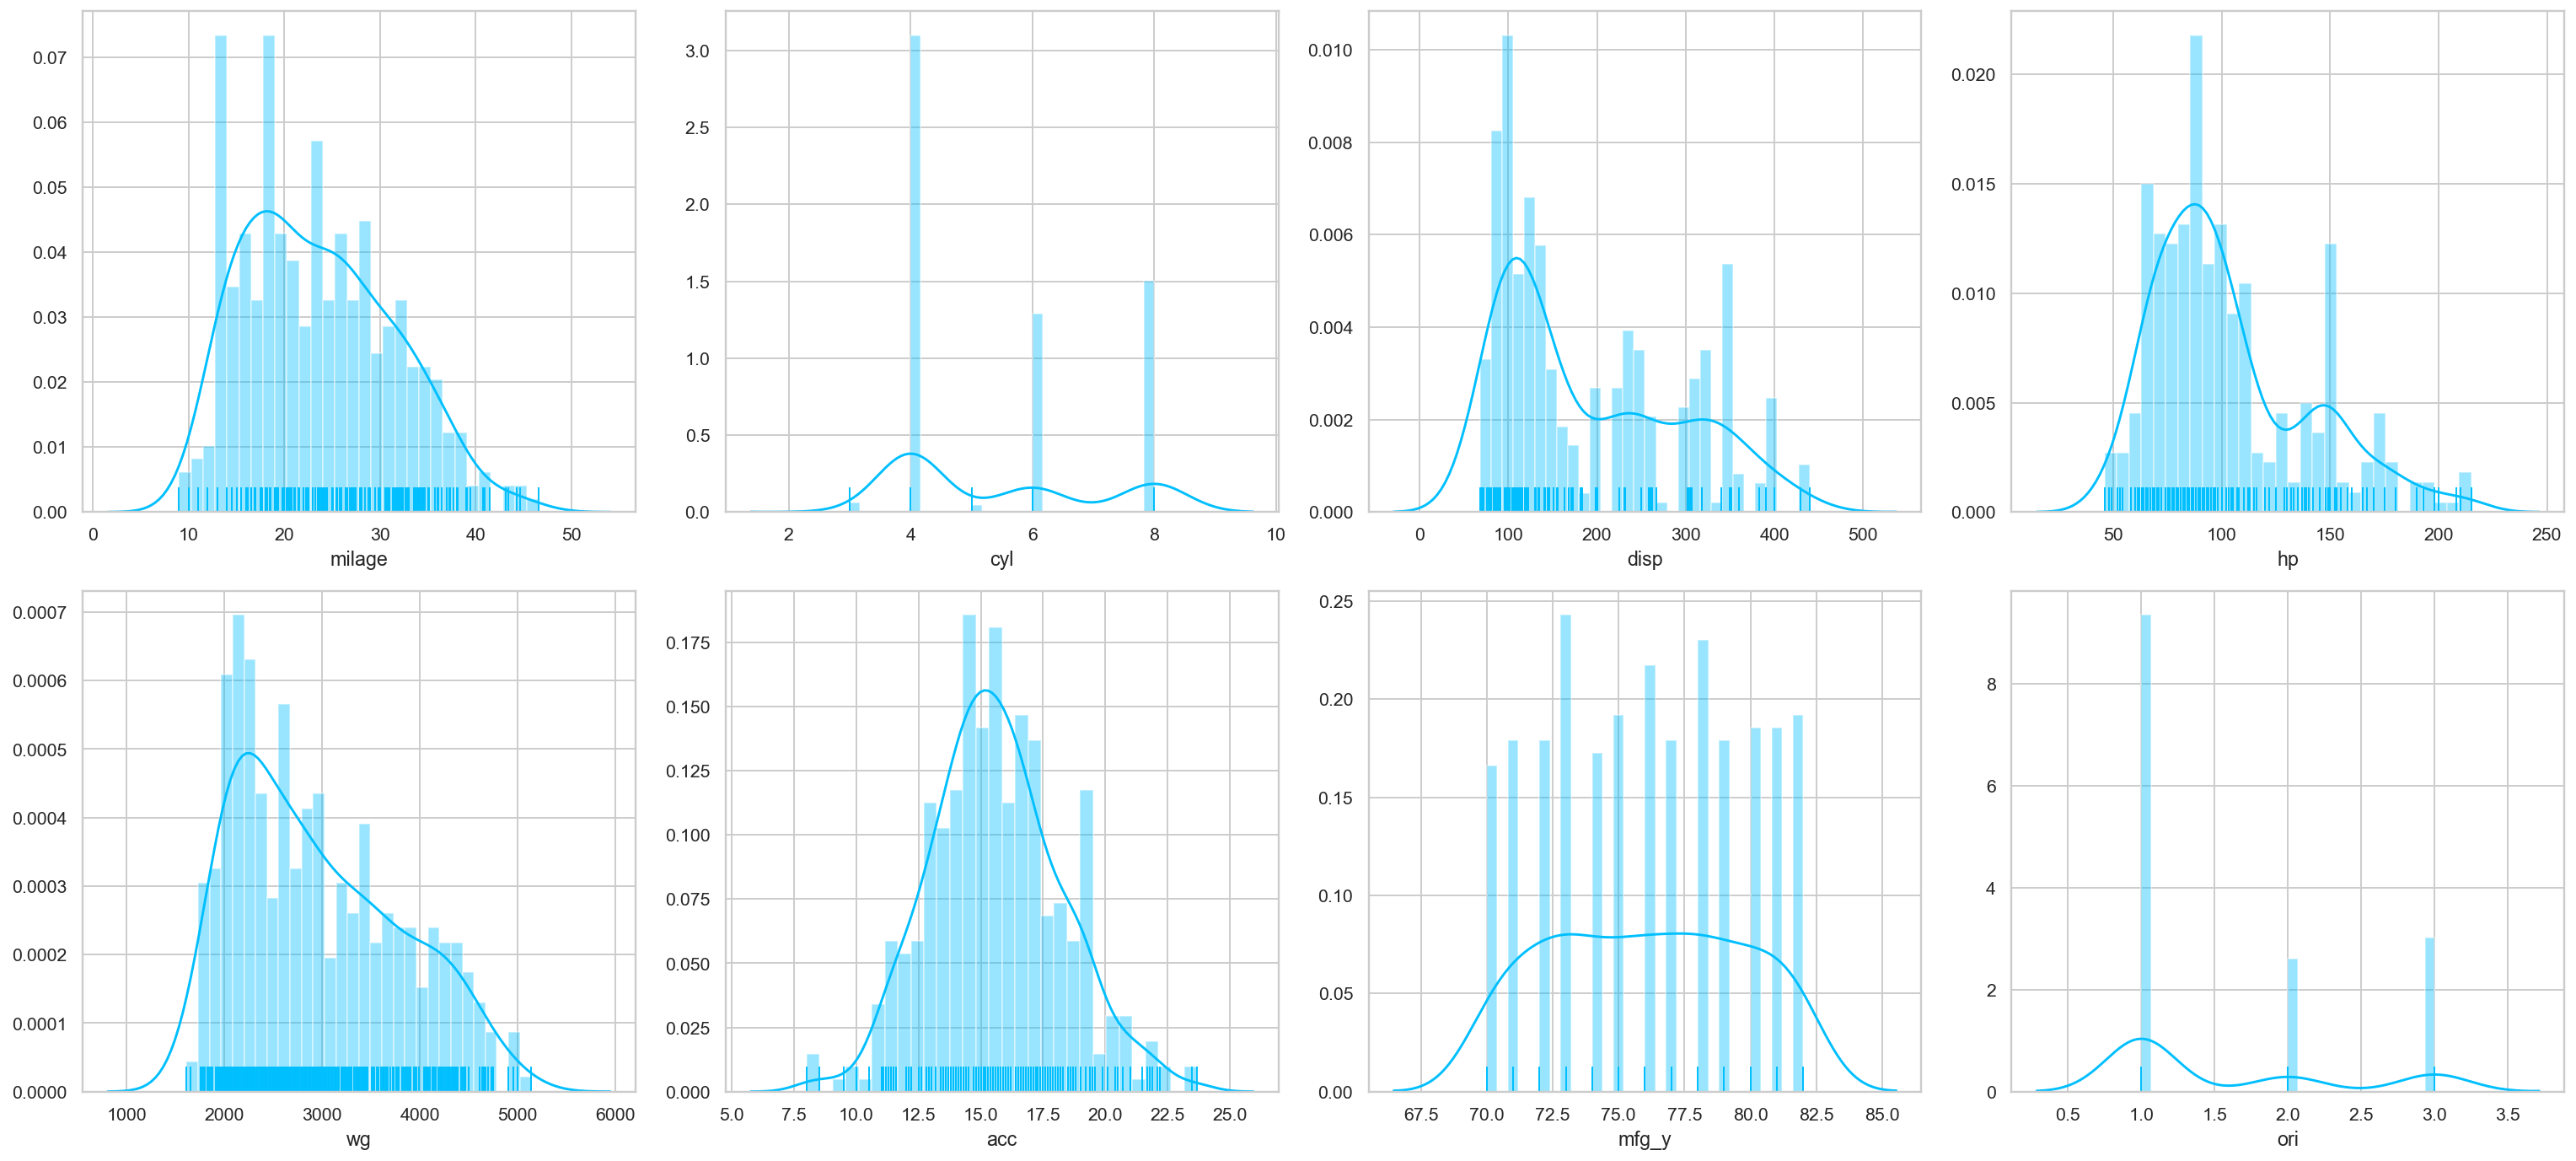

In [48]:
#using distplot to view distribution of all attributes
plt.figure(figsize=(22,10),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,8):
    plt.subplot(2,4,i+1)
    sns.distplot(Mpg[cl[i]],color='deepskyblue',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [49]:
#checking skewness
Mpg.skew()

milage    0.433170
cyl       0.552494
disp      0.690697
hp        0.977696
wg        0.542438
acc       0.217097
mfg_y     0.004518
ori       0.911256
dtype: float64

In [50]:
for i in Mpg.columns:
    if Mpg.skew().loc[i]>0.55:
        Mpg[i]=np.log1p(Mpg[i])
print(Mpg.skew())

milage    0.433170
cyl       0.414557
disp      0.224197
hp        0.311243
wg        0.542438
acc       0.217097
mfg_y     0.004518
ori       0.786400
dtype: float64


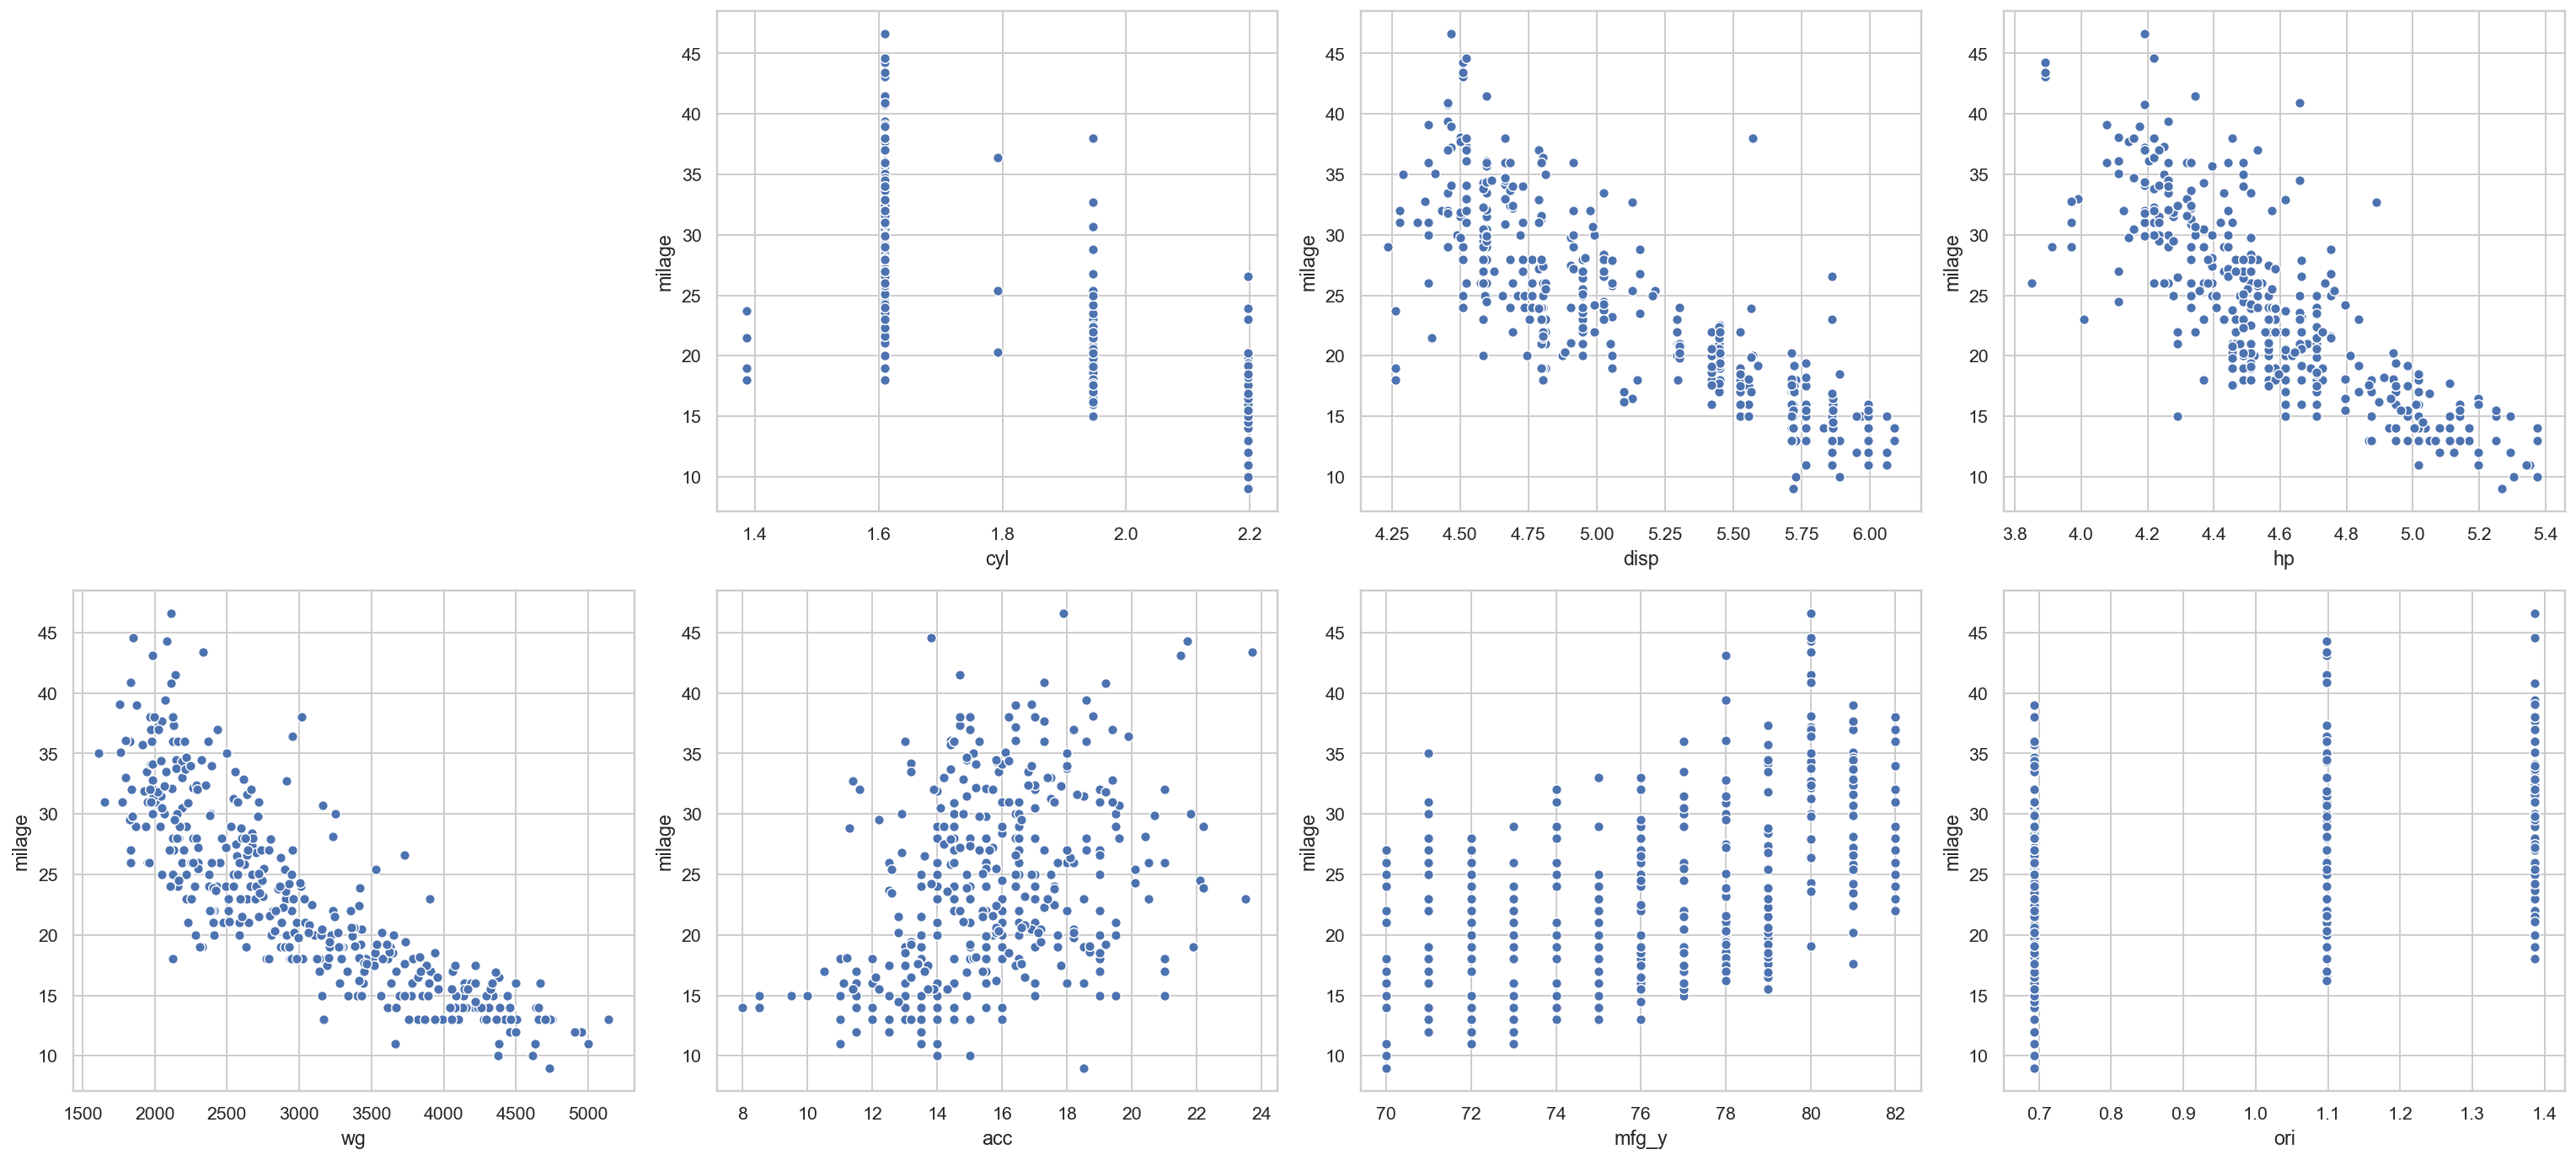

In [51]:
#using scatterplot to view relations between attributes wrt to output
plt.figure(figsize=(22,10),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (1,8):
    plt.subplot(2,4,i+1)
    sns.scatterplot(x=Mpg[cl[i]],y=Mpg[cl[0]],data=Mpg,ci=50,palette='plasma_r')
plt.tight_layout()

In [52]:
#checking corelation
mpg_corr=Mpg.corr()
mpg_corr

,milage,cyl,disp,hp,wg,acc,mfg_y,ori
milage,1.000000,-0.772511,-0.826950,-0.807349,-0.833008,0.392418,0.567035,0.567755
cyl,-0.772511,1.000000,0.945758,0.821402,0.892781,-0.464465,-0.322853,-0.584211
disp,-0.826950,0.945758,1.000000,0.861108,0.938588,-0.475247,-0.306844,-0.681918
hp,-0.807349,0.821402,0.861108,1.000000,0.875503,-0.670422,-0.363377,-0.491174
wg,-0.833008,0.892781,0.938588,0.875503,1.000000,-0.403533,-0.290593,-0.590281
acc,0.392418,-0.464465,-0.475247,-0.670422,-0.403533,1.000000,0.251599,0.198852
mfg_y,0.567035,-0.322853,-0.306844,-0.363377,-0.290593,0.251599,1.000000,0.161677
ori,0.567755,-0.584211,-0.681918,-0.491174,-0.590281,0.198852,0.161677,1.000000


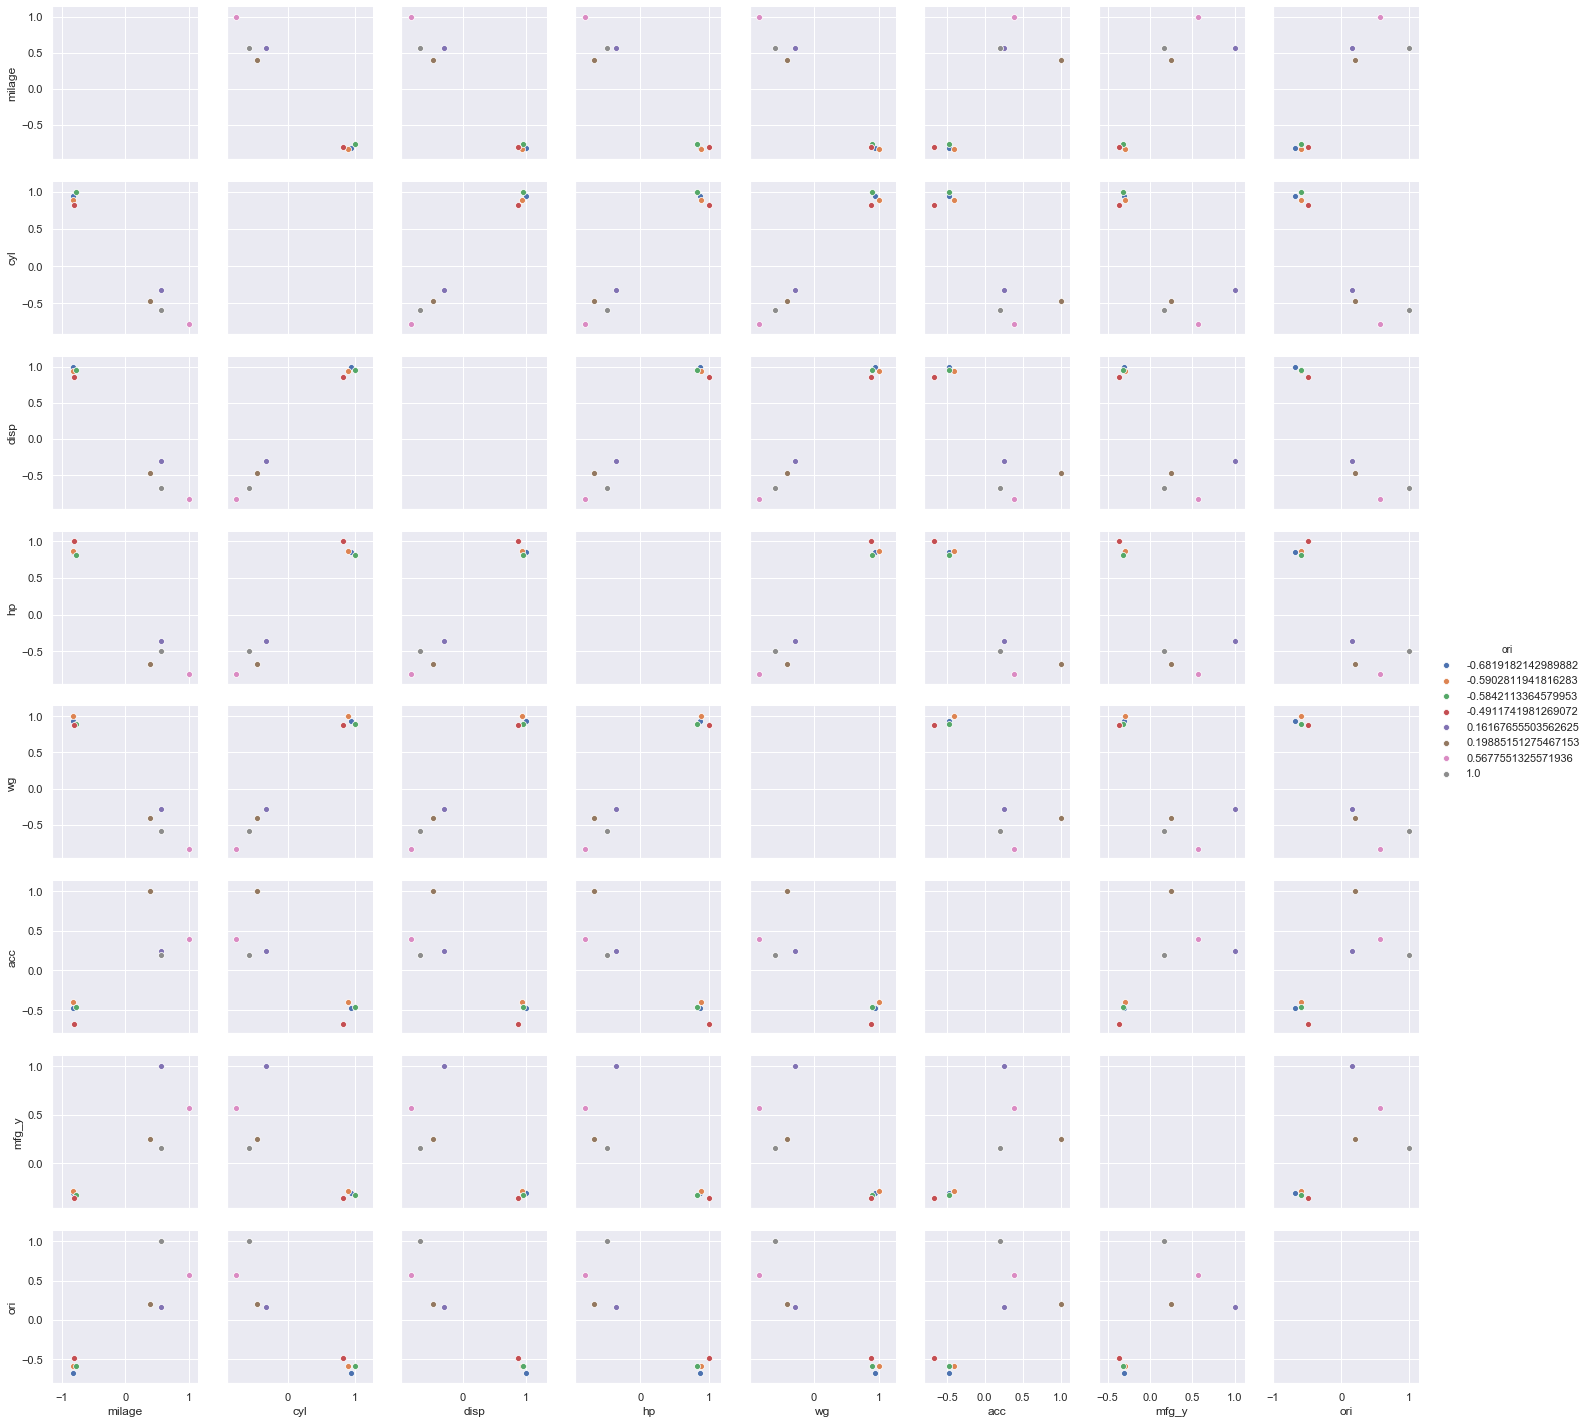

In [53]:
sns.set_context('talk',font_scale=1.4)
sns.set(style='darkgrid')
sns.pairplot(mpg_corr,hue='ori')

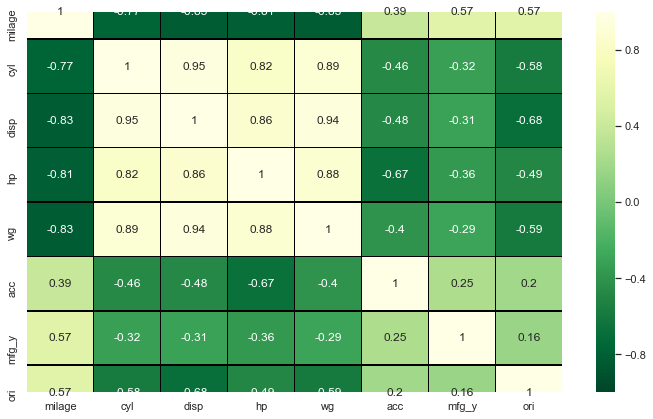

In [54]:
plt.figure(figsize=(12,7))
sns.set_context('talk',font_scale=1.4)
sns.set(style='darkgrid')
sns.heatmap(mpg_corr,annot=True,cmap='YlGn_r',vmax=1,vmin=-1,linewidth=0.5,linecolor='black')

In [55]:
#importing important librarier for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')



In [56]:
Mpg.head(3)

,milage,cyl,disp,hp,wg,acc,mfg_y,ori
0,18.0,2.197225,5.730100,4.875197,3504.0,12.0,70,0.693147
1,15.0,2.197225,5.860786,5.111988,3693.0,11.5,70,0.693147
2,18.0,2.197225,5.765191,5.017280,3436.0,11.0,70,0.693147


In [57]:
x=Mpg.iloc[:,1:]
x.head(7)

,cyl,disp,hp,wg,acc,mfg_y,ori
0,2.197225,5.730100,4.875197,3504.0,12.0,70,0.693147
1,2.197225,5.860786,5.111988,3693.0,11.5,70,0.693147
2,2.197225,5.765191,5.017280,3436.0,11.0,70,0.693147
3,2.197225,5.720312,5.017280,3433.0,12.0,70,0.693147
4,2.197225,5.713733,4.948760,3449.0,10.5,70,0.693147
5,2.197225,6.063785,5.293305,4341.0,10.0,70,0.693147
7,2.197225,6.089045,5.375278,4312.0,8.5,70,0.693147


In [58]:
y=Mpg.iloc[:,0]
y.head(8)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
7    14.0
9    15.0
Name: milage, dtype: float64

In [59]:
#using standard scaler on x to scale the values
ss=StandardScaler()
x=ss.fit_transform(x)

In [60]:
#converting y interm of np.array and reshaping in form of many rows and one column
y=np.array(y)
y=y.reshape(-1,1)

In [61]:
print('Shape of x=', x.shape,'\nShape of y=',y.shape)

Shape of x= (391, 7) 
Shape of y= (391, 1)


Generating a function to achive highest performing parameters for each algo

In [62]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    r2=0
    for i in range(27,240):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
          '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

LINER REGRESSION

In [63]:
lireg=LinearRegression()
m1=model(lireg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  173 
 r2 score =  0.7839192615130993 
 mean abs error value (MAE)=  2.4974185649824108 
 mean squared error value (MSE)=  10.600440574862581 
 & root mean sq error (RMSE)=  3.25583177926357


In [64]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,x,y,cv=30,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.4781920081316359


LASSO REGRESSION

In [65]:
import warnings
warnings.filterwarnings('ignore')

#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001),'max_iter':(20,40,50,90,150)}
lso_rsv=rsv(lso,lso_para,cv=30,n_iter=20)
lso_rsv.fit(x,y)
print(lso_rsv)
print('\nbest_score=',lso_rsv.best_score_)
print('\nbest_parameters=',lso_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': (0.01, 0.1, 1.0, 10, 0.001),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.4761690548554202

best_parameters= {'max_iter': 150, 'alpha': 0.01}


In [66]:
lso=Lasso(alpha=0.01,max_iter=150)
m2=model(lso,x,y)

In this Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=150,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  173 
 r2 score =  0.7853590015274439 
 mean abs error value (MAE)=  2.4930385311049226 
 mean squared error value (MSE)=  10.529810131019312 
 & root mean sq error (RMSE)=  3.24496689212992


In [67]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,x,y,cv=30,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.4789081587445271


RIDGE REGRESSION

In [68]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
rid_rsv=rsv(rid,rid_para,cv=30,n_iter=20)
rid_rsv.fit(x,y)
print('best_score=',rid_rsv.best_score_)
print('best_parameters=',rid_rsv.best_params_)

best_score= 0.4844653685657396
best_parameters= {'max_iter': 90, 'alpha': 12}


In [69]:
rid=Ridge(alpha=12,max_iter=90)
m3=model(rid,x,y)


In this Ridge(alpha=12, copy_X=True, fit_intercept=True, max_iter=90, normalize=False,
      random_state=None, solver='auto', tol=0.001) model 
 Random State=  38 
 r2 score =  0.7914944412381377 
 mean abs error value (MAE)=  2.4800562853692907 
 mean squared error value (MSE)=  10.2288191009567 
 & root mean sq error (RMSE)=  3.1982525073791


In [70]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,x,y,cv=40,scoring='r2')
print('the R2 score at  RIDGE model is=',rid_scr.mean())

the R2 score at  RIDGE model is= 0.22834557400247898


ELASTIC NET

In [71]:
#checking for best parameters for Ridge using RandomizedSearchCV
els=ElasticNet()
els_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
els_rsv=rsv(els,els_para,cv=30,n_iter=20)
els_rsv.fit(x,y)
print(els_rsv)
print('best_score=',els_rsv.best_score_)
print('best_parameters=',els_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
best_score= 0.4810440434854503
best_parameters= {'max_iter': 150, 'alpha': 0.1}


In [72]:
els=ElasticNet(max_iter=150,alpha=0.1)
m4=model(els,x,y)

In this ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=150, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  173 
 r2 score =  0.790457931342694 
 mean abs error value (MAE)=  2.5039337784582885 
 mean squared error value (MSE)=  10.279667971748454 
 & root mean sq error (RMSE)=  3.2061921295749656


In [73]:
#CHECKING FOR OVER/UNDER FITTING
els_scr=cvs(els,x,y,cv=40,scoring='r2')
print('the R2 score at ELASTIC NET model is=',els_scr.mean())

the R2 score at ELASTIC NET model is= 0.21907389089216495


DECISION TREE REGRESSION

In [74]:
#check for best parameters using RandomizedSearchCV
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':range(1,8),
    'min_samples_split':range(3,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
print(dtr_rsv)
print(dtr_rsv.best_score_)
print(dtr_rsv.best_params_)

RandomizedSearchCV(cv=80, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_d

In [75]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,min_samples_split=6,splitter='random')
m5=model(dtr,x,y)

In this DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random') model 
 Random State=  166 
 r2 score =  0.7836700006768619 
 mean abs error value (MAE)=  2.5511844663589436 
 mean squared error value (MSE)=  10.61266875725717 
 & root mean sq error (RMSE)=  3.257709127171603


In [76]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= -0.832692229359464


SVR

In [77]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=20,n_iter=40,)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'linear', 'gamma': 0.001}

In [78]:
svr=SVR(kernel='linear',gamma=0.001,C=8)
m6=model(svr,x,y)

In this SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  38 
 r2 score =  0.7899123622936046 
 mean abs error value (MAE)=  2.3976547996275337 
 mean squared error value (MSE)=  10.306432376224551 
 & root mean sq error (RMSE)=  3.2103632779211377


In [79]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= 0.2757617836512777


KNEIGHBORS REGRESSOR

In [80]:
knr=KNeighborsRegressor()
kp={'n_neighbors':range(2,18),'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(4,12)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
k_rsv.best_params_

{'n_neighbors': 6, 'leaf_size': 6, 'algorithm': 'kd_tree'}

In [81]:
knr=KNeighborsRegressor(n_neighbors=6,leaf_size=6,algorithm='kd_tree')
m7=model(knr,x,y)

In this KNeighborsRegressor(algorithm='kd_tree', leaf_size=6, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform') model 
 Random State=  199 
 r2 score =  0.8504820365790248 
 mean abs error value (MAE)=  2.066101694915254 
 mean squared error value (MSE)=  7.33501883239171 
 & root mean sq error (RMSE)=  2.7083239895536337


In [82]:
#CHECKING FOR OVER/UNDER FITTING
knr_scr=cvs(knr,x,y,cv=40,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= 0.4569605322648016


RANDOM FOREST REGRESSOR

In [83]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,8),'min_samples_leaf':range(3,6),'max_depth':[3,8,13]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 13}

In [84]:
rfr=RandomForestRegressor(n_estimators=250,max_features=3,min_samples_leaf=3,max_depth=13)
m8=model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  199 
 r2 score =  0.8655615252569346 
 mean abs error value (MAE)=  1.9326802098455438 
 mean squared error value (MSE)=  6.595252647081366 
 & root mean sq error (RMSE)=  2.568122397215788


In [85]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',rfr_scr.mean())

the R2 score at SVR model is= 0.47483333198248195


Putting all those scores obtained in a single dataframe for batter visualization and judgement.

In [87]:
infos=[['LINEAR_REG',173,0.7839192,0.478192008],
      ['LASSO',173,0.78535900,0.4789081],
      ['RIDGE',38,0.7914944,0.2283455],
      ['ELASTIC NET',173,0.7904579,0.2190738],
      ['DECISION TREE REGRESSOR',166,0.78367000,-0.8326922],
      ['SVR',38,0.7899123,0.27576178],
      ['KNEIGHBORS_REGRESSOR',199, 0.85048203,0.4569605],
      ['RANDOM FOREST REGRESSOR',199,0.8655615,0.47483333]]


SCOREBORD=pd.DataFrame(infos,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])
SCOREBORD.style.background_gradient(cmap='rainbow', low=0, high=175)


#R2_SCORE W/O CV, R2_SCORE WITH CV represents the r2 score obtained from modelling and cross_validation respectively

,MOD_NAME,RAND_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,173,0.783919,0.478192
1,LASSO,173,0.785359,0.478908
2,RIDGE,38,0.791494,0.228346
3,ELASTIC NET,173,0.790458,0.219074
4,DECISION TREE REGRESSOR,166,0.78367,-0.832692
5,SVR,38,0.789912,0.275762
6,KNEIGHBORS_REGRESSOR,199,0.850482,0.45696
7,RANDOM FOREST REGRESSOR,199,0.865561,0.474833


as all the models are not performing well so we will use adaboost regressor with lasso as base model

In [88]:
from sklearn.ensemble import AdaBoostRegressor
#calling boosting algo

In [89]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=173)
lso=Lasso(alpha=0.01,max_iter=150)
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=lso)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

best parameters: {'learning_rate': 0.001}

 best score: 0.7177782638411153


In [90]:
abr=AdaBoostRegressor(base_estimator=lso,learning_rate=0.001)
model(abr,x,y)

In this AdaBoostRegressor(base_estimator=Lasso(alpha=0.01, copy_X=True,
                                       fit_intercept=True, max_iter=150,
                                       normalize=False, positive=False,
                                       precompute=False, random_state=None,
                                       selection='cyclic', tol=0.0001,
                                       warm_start=False),
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=None) model 
 Random State=  173 
 r2 score =  0.790550739241599 
 mean abs error value (MAE)=  2.440016794644664 
 mean squared error value (MSE)=  10.275115022586444 
 & root mean sq error (RMSE)=  3.2054820265580095


In [91]:
#saving the model
import joblib
joblib.dump(abr,'FUEL_CONSUMPTION_ABR.pkl')

['FUEL_CONSUMPTION_ABR.pkl']